## Vocal Gender Classification

In [2]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import boxcox
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [3]:
# Loading data
data = pd.read_csv('vocal_gender_features_new.csv')
data

mean_spectral_centroid  std_spectral_centroid  mean_spectral_bandwidth  \
0                 2247.331739            1158.537748              1870.415462   
1                 1790.719889             996.554825              1757.898617   
2                 1977.923363            1010.148667              1747.099555   
3                 2037.765550            1311.440630              1745.224852   
4                 1739.383829            1092.623322              1623.135563   
...                       ...                    ...                      ...   
16143             1879.614568            1092.394432              1802.821290   
16144             1810.603695            1124.628905              1829.785209   
16145             1820.216958            1197.520780              1770.716715   
16146             1636.619660            1055.832051              1747.968472   
16147             1604.684012            1023.600709              1702.723635   

       std_spectral_bandwidth  mean_spectral_contrast  mean_spectral_flatness  \
0                  370.405241               21.440710                0.036879   
1                  410.710318               21.513383                0.018936   
2                  461.458379               20.476283                0.032616   
3                  419.056484               19.516014                0.028482   
4                  450.088465               20.260620                0.025737   
...                       ...                     ...                     ...   
16143              479.751352               19.930251                0.017547   
16144              491.274993               19.115077                0.017356   
16145              509.906085               19.506173                0.015819   
16146              500.649272               19.118411                0.014007   
16147              555.133862               19.279221                0.016868   

       mean_spectral_rolloff  zero_crossing_rate  rms_energy  mean_pitch  ...  \
0                4419.438073            0.169241    0.082552   1592.1033  ...   
1                3635.742188            0.108068    0.055477   1112.6351  ...   
2                3873.291016            0.144633    0.060388   1557.5225  ...   
3                3826.584507            0.148933    0.029559   1481.0868  ...   
4                3452.903892            0.117961    0.069078   1424.5352  ...   
...                      ...                 ...         ...         ...  ...   
16143            3882.812500            0.116425    0.088527   1458.0010  ...   
16144            3816.685268            0.110338    0.067830   1538.0670  ...   
16145            3728.759766            0.105142    0.073135   1637.4955  ...   
16146            3524.797712            0.094456    0.071088   1453.4177  ...   
16147            3375.034877            0.092815    0.062664   1479.7195  ...   

       mfcc_9_std  mfcc_10_mean  mfcc_10_std  mfcc_11_mean  mfcc_11_std  \
0       21.736240      2.303085     8.983318    -17.410305     9.115154   
1       13.937135     -0.953942    10.831742     -0.088775    10.297690   
2       14.900779      0.260098    14.031009     -0.420670    10.810292   
3       15.957924     -1.486122    14.461978     -8.479608    12.550333   
4       15.105562     -3.366364    13.943447     -6.561539    11.944948   
...           ...           ...          ...           ...          ...   
16143   12.486454     -4.034742    13.771613     -5.278946    14.380637   
16144   12.727633     -2.590058    15.919325     -6.724170    14.858981   
16145   12.606261     -0.207149    15.909226     -9.772965    18.003307   
16146   11.453891     -2.735264    15.467333     -4.670631    12.668987   
16147   11.104643     -1.721383    13.189034    -10.234873    15.319916   

       mfcc_12_mean  mfcc_12_std  mfcc_13_mean  mfcc_13_std  label  
0          0.301804    10.452693     -3.080832    10.146248      0  
1         -7.281142    10.926579     -0.450248   

# Exploring The Data

In [5]:
# converting data into dataframe
df = pd.DataFrame(data)
df.head()

mean_spectral_centroid  std_spectral_centroid  mean_spectral_bandwidth  \
0             2247.331739            1158.537748              1870.415462   
1             1790.719889             996.554825              1757.898617   
2             1977.923363            1010.148667              1747.099555   
3             2037.765550            1311.440630              1745.224852   
4             1739.383829            1092.623322              1623.135563   

   std_spectral_bandwidth  mean_spectral_contrast  mean_spectral_flatness  \
0              370.405241               21.440710                0.036879   
1              410.710318               21.513383                0.018936   
2              461.458379               20.476283                0.032616   
3              419.056484               19.516014                0.028482   
4              450.088465               20.260620                0.025737   

   mean_spectral_rolloff  zero_crossing_rate  rms_energy  mean_pitch  ...  \
0            4419.438073            0.169241    0.082552   1592.1033  ...   
1            3635.742188            0.108068    0.055477   1112.6351  ...   
2            3873.291016            0.144633    0.060388   1557.5225  ...   
3            3826.584507            0.148933    0.029559   1481.0868  ...   
4            3452.903892            0.117961    0.069078   1424.5352  ...   

   mfcc_9_std  mfcc_10_mean  mfcc_10_std  mfcc_11_mean  mfcc_11_std  \
0   21.736240      2.303085     8.983318    -17.410305     9.115154   
1   13.937135     -0.953942    10.831742     -0.088775    10.297690   
2   14.900779      0.260098    14.031009     -0.420670    10.810292   
3   15.957924     -1.486122    14.461978     -8.479608    12.550333   
4   15.105562     -3.366364    13.943447     -6.561539    11.944948   

   mfcc_12_mean  mfcc_12_std  mfcc_13_mean  mfcc_13_std  label  
0      0.301804    10.452693     -3.080832    10.146248      0  
1     -7.281142    10.926579     -0.450248     8.489134      0  
2     -0.199829    11.986182      3.372986     9.285437      0  
3      3.997028     9.912608     -6.946966    10.574301      0  
4      1.410639    13.110976     -3.252258     9.866687      0  

[5 rows x 44 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16148 entries, 0 to 16147
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean_spectral_centroid   16148 non-null  float64
 1   std_spectral_centroid    16148 non-null  float64
 2   mean_spectral_bandwidth  16148 non-null  float64
 3   std_spectral_bandwidth   16148 non-null  float64
 4   mean_spectral_contrast   16148 non-null  float64
 5   mean_spectral_flatness   16148 non-null  float64
 6   mean_spectral_rolloff    16148 non-null  float64
 7   zero_crossing_rate       16148 non-null  float64
 8   rms_energy               16148 non-null  float64
 9   mean_pitch               16148 non-null  float64
 10  min_pitch                16148 non-null  float64
 11  max_pitch                16148 non-null  float64
 12  std_pitch                16148 non-null  float64
 13  spectral_skew            16148 non-null  float64
 14  spectral_kurtosis     

In [7]:
df.tail()

mean_spectral_centroid  std_spectral_centroid  mean_spectral_bandwidth  \
16143             1879.614568            1092.394432              1802.821290   
16144             1810.603695            1124.628905              1829.785209   
16145             1820.216958            1197.520780              1770.716715   
16146             1636.619660            1055.832051              1747.968472   
16147             1604.684012            1023.600709              1702.723635   

       std_spectral_bandwidth  mean_spectral_contrast  mean_spectral_flatness  \
16143              479.751352               19.930251                0.017547   
16144              491.274993               19.115077                0.017356   
16145              509.906085               19.506173                0.015819   
16146              500.649272               19.118411                0.014007   
16147              555.133862               19.279221                0.016868   

       mean_spectral_rolloff  zero_crossing_rate  rms_energy  mean_pitch  ...  \
16143            3882.812500            0.116425    0.088527   1458.0010  ...   
16144            3816.685268            0.110338    0.067830   1538.0670  ...   
16145            3728.759766            0.105142    0.073135   1637.4955  ...   
16146            3524.797712            0.094456    0.071088   1453.4177  ...   
16147            3375.034877            0.092815    0.062664   1479.7195  ...   

       mfcc_9_std  mfcc_10_mean  mfcc_10_std  mfcc_11_mean  mfcc_11_std  \
16143   12.486454     -4.034742    13.771613     -5.278946    14.380637   
16144   12.727633     -2.590058    15.919325     -6.724170    14.858981   
16145   12.606261     -0.207149    15.909226     -9.772965    18.003307   
16146   11.453891     -2.735264    15.467333     -4.670631    12.668987   
16147   11.104643     -1.721383    13.189034    -10.234873    15.319916   

       mfcc_12_mean  mfcc_12_std  mfcc_13_mean  mfcc_13_std  label  
16143      5.627317     9.196584     -7.411221    12.621205      1  
16144      6.610045     8.266881     -6.264262    13.771297      1  
16145      4.041325     9.128441     -3.483847    11.820591      1  
16146      3.787537     8.726358     -7.397458    13.588392      1  
16147      2.323231     8.570886     -4.725372    11.012844      1  

[5 rows x 44 columns]

In [8]:

df.describe()

mean_spectral_centroid  std_spectral_centroid  mean_spectral_bandwidth  \
count            16148.000000           16148.000000             16148.000000   
mean              1709.269730            1027.564673              1584.195931   
std                315.558063             286.303662               126.360465   
min                719.559285             194.998983              1106.939002   
25%               1475.078509             829.195585              1503.301521   
50%               1703.038854            1048.531356              1583.959951   
75%               1921.202685            1233.451527              1665.806788   
max               3059.390150            1912.173446              2046.070801   

       std_spectral_bandwidth  mean_spectral_contrast  mean_spectral_flatness  \
count            16148.000000            16148.000000            16148.000000   
mean               432.492328               20.395652                0.023086   
std                 78.723202                1.628596                0.010027   
min                199.321584               15.154801                0.001816   
25%                379.552391               19.775875                0.015567   
50%                423.121818               20.759579                0.021737   
75%                477.631817               21.516436                0.029175   
max                724.361505               24.907725                0.072172   

       mean_spectral_rolloff  zero_crossing_rate    rms_energy    mean_pitch  \
count           16148.000000        16148.000000  16148.000000  16148.000000   
mean             3281.808257            0.118088      0.084759   1461.624198   
std               526.824341            0.037707      0.022814    287.763342   
min              1310.661765            0.027727      0.022425    359.391170   
25%              2911.427574            0.089729      0.067508   1279.141250   
50%              3293.459741            0.116623      0.083121   1484.461250   
75%              3637.773811            0.144095      0.100465   1662.883350   
max              5451.099537            0.270710      0.187577   2454.724000   

       ...    mfcc_9_std  mfcc_10_mean   mfcc_10_std  mfcc_11_mean  \
count  ...  16148.000000  16148.000000  16148.000000  16148.000000   
mean   ...     13.537739     -0.533815     12.515116     -8.933890   
std    ...      2.438230      5.593673      2.354020      5.315098   
min    ...      5.826506    -20.188465      5.459179    -26.082537   
25%    ...     11.861280     -4.521667     10.753869    -12.666048   
50%    ...     13.306489     -0.625990     12.279825     -8.732289   
75%    ...     15.044193      3.136063     14.099204     -5.328175   
max    ...     26.693924     19.610289     22.717190      6.013963   

        mfcc_11_std  mfcc_12_mean   mfcc_12_std  mfcc_13_mean   mfcc_13_std  \
count  16148.000000  16148.000000  16148.000000  16148.000000  16148.000000   
mean      10.982858      0.880024      9.721608     -6.711788      9.536517   
std        1.886158      4.314862      1.794407      4.069641      1.574890   
min        5.594748    -13.585977      4.378153    -26.402317      4.686154   
25%        9.641137     -2.050272      8.455685     -9.676477      8.432545   
50%       10.796652      0.949182      9.595896     -6.598702      9.433592   
75%       12.153640      3.896141     10.863349     -3.575793     10.508087   
max       19.685654     16.436730     17.380630      6.187790     17.941544   

              label  
count  16148.000000  
mean       0.642804  
std        0.479188  
min        0.000000  
25%        0.000000  
50%        1.000000  
75%        1.000000  
max        1.000000  

[8 rows x 44 columns]

In [9]:
df.shape

(16148, 44)

In [10]:
# Column names in the dataset
df.columns

Index(['mean_spectral_centroid', 'std_spectral_centroid',
       'mean_spectral_bandwidth', 'std_spectral_bandwidth',
       'mean_spectral_contrast', 'mean_spectral_flatness',
       'mean_spectral_rolloff', 'zero_crossing_rate', 'rms_energy',
       'mean_pitch', 'min_pitch', 'max_pitch', 'std_pitch', 'spectral_skew',
       'spectral_kurtosis', 'energy_entropy', 'log_energy', 'mfcc_1_mean',
       'mfcc_1_std', 'mfcc_2_mean', 'mfcc_2_std', 'mfcc_3_mean', 'mfcc_3_std',
       'mfcc_4_mean', 'mfcc_4_std', 'mfcc_5_mean', 'mfcc_5_std', 'mfcc_6_mean',
       'mfcc_6_std', 'mfcc_7_mean', 'mfcc_7_std', 'mfcc_8_mean', 'mfcc_8_std',
       'mfcc_9_mean', 'mfcc_9_std', 'mfcc_10_mean', 'mfcc_10_std',
       'mfcc_11_mean', 'mfcc_11_std', 'mfcc_12_mean', 'mfcc_12_std',
       'mfcc_13_mean', 'mfcc_13_std', 'label'],
      dtype='object')

In [11]:
# Checking Data class balance
print(df['label'].value_counts())

label
1    10380
0     5768
Name: count, dtype: int64


# Data Cleaning

In [13]:
# Checking for null values

df.isnull().sum()

mean_spectral_centroid     0
std_spectral_centroid      0
mean_spectral_bandwidth    0
std_spectral_bandwidth     0
mean_spectral_contrast     0
mean_spectral_flatness     0
mean_spectral_rolloff      0
zero_crossing_rate         0
rms_energy                 0
mean_pitch                 0
min_pitch                  0
max_pitch                  0
std_pitch                  0
spectral_skew              0
spectral_kurtosis          0
energy_entropy             0
log_energy                 0
mfcc_1_mean                0
mfcc_1_std                 0
mfcc_2_mean                0
mfcc_2_std                 0
mfcc_3_mean                0
mfcc_3_std                 0
mfcc_4_mean                0
mfcc_4_std                 0
mfcc_5_mean                0
mfcc_5_std                 0
mfcc_6_mean                0
mfcc_6_std                 0
mfcc_7_mean                0
mfcc_7_std                 0
mfcc_8_mean                0
mfcc_8_std                 0
mfcc_9_mean                0
mfcc_9_std    

In [14]:
# Checking for duplicate values
df.duplicated().sum()

1078

In [15]:
duplicates = df[df.duplicated()]
print(duplicates.head())

      mean_spectral_centroid  std_spectral_centroid  mean_spectral_bandwidth  \
4153             1412.128910             920.473327              1414.160017   
4156             1350.984280             697.583027              1405.091432   
4159             1700.003436            1139.849988              1563.882152   
4162             1603.435295            1098.400082              1504.251367   
4165             2232.938291            1631.809654              1651.055700   

      std_spectral_bandwidth  mean_spectral_contrast  mean_spectral_flatness  \
4153              622.996586               22.248629                0.032454   
4156              497.950051               21.674845                0.025402   
4159              591.271918               21.496923                0.024522   
4162              539.193703               22.398801                0.026613   
4165              612.490155               20.603783                0.047873   

      mean_spectral_rolloff  zero_cros

In [16]:
# Dropping Duplicates
df.drop_duplicates()

mean_spectral_centroid  std_spectral_centroid  mean_spectral_bandwidth  \
0                 2247.331739            1158.537748              1870.415462   
1                 1790.719889             996.554825              1757.898617   
2                 1977.923363            1010.148667              1747.099555   
3                 2037.765550            1311.440630              1745.224852   
4                 1739.383829            1092.623322              1623.135563   
...                       ...                    ...                      ...   
16143             1879.614568            1092.394432              1802.821290   
16144             1810.603695            1124.628905              1829.785209   
16145             1820.216958            1197.520780              1770.716715   
16146             1636.619660            1055.832051              1747.968472   
16147             1604.684012            1023.600709              1702.723635   

       std_spectral_bandwidth  mean_spectral_contrast  mean_spectral_flatness  \
0                  370.405241               21.440710                0.036879   
1                  410.710318               21.513383                0.018936   
2                  461.458379               20.476283                0.032616   
3                  419.056484               19.516014                0.028482   
4                  450.088465               20.260620                0.025737   
...                       ...                     ...                     ...   
16143              479.751352               19.930251                0.017547   
16144              491.274993               19.115077                0.017356   
16145              509.906085               19.506173                0.015819   
16146              500.649272               19.118411                0.014007   
16147              555.133862               19.279221                0.016868   

       mean_spectral_rolloff  zero_crossing_rate  rms_energy  mean_pitch  ...  \
0                4419.438073            0.169241    0.082552   1592.1033  ...   
1                3635.742188            0.108068    0.055477   1112.6351  ...   
2                3873.291016            0.144633    0.060388   1557.5225  ...   
3                3826.584507            0.148933    0.029559   1481.0868  ...   
4                3452.903892            0.117961    0.069078   1424.5352  ...   
...                      ...                 ...         ...         ...  ...   
16143            3882.812500            0.116425    0.088527   1458.0010  ...   
16144            3816.685268            0.110338    0.067830   1538.0670  ...   
16145            3728.759766            0.105142    0.073135   1637.4955  ...   
16146            3524.797712            0.094456    0.071088   1453.4177  ...   
16147            3375.034877            0.092815    0.062664   1479.7195  ...   

       mfcc_9_std  mfcc_10_mean  mfcc_10_std  mfcc_11_mean  mfcc_11_std  \
0       21.736240      2.303085     8.983318    -17.410305     9.115154   
1       13.937135     -0.953942    10.831742     -0.088775    10.297690   
2       14.900779      0.260098    14.031009     -0.420670    10.810292   
3       15.957924     -1.486122    14.461978     -8.479608    12.550333   
4       15.105562     -3.366364    13.943447     -6.561539    11.944948   
...           ...           ...          ...           ...          ...   
16143   12.486454     -4.034742    13.771613     -5.278946    14.380637   
16144   12.727633     -2.590058    15.919325     -6.724170    14.858981   
16145   12.606261     -0.207149    15.909226     -9.772965    18.003307   
16146   11.453891     -2.735264    15.467333     -4.670631    12.668987   
16147   11.104643     -1.721383    13.189034    -10.234873    15.319916   

       mfcc_12_mean  mfcc_12_std  mfcc_13_mean  mfcc_13_std  label  
0          0.301804    10.452693     -3.080832    10.146248      0  
1         -7.281142    10.926579     -0.450248   

## Dataset Visualisation


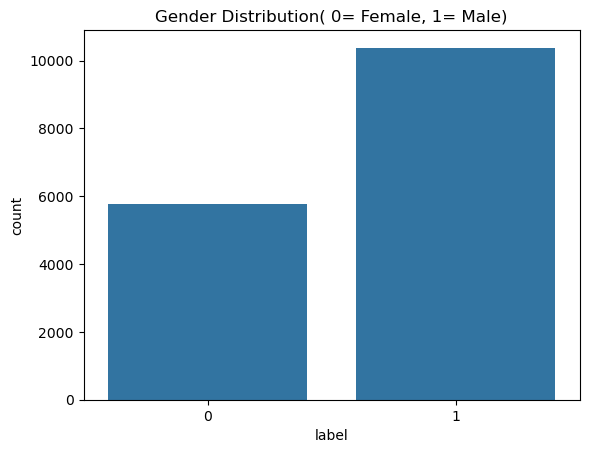

In [18]:
# To check Class

sns.countplot(x='label', data=df)
plt.title("Gender Distribution( 0= Female, 1= Male)")
plt.show()

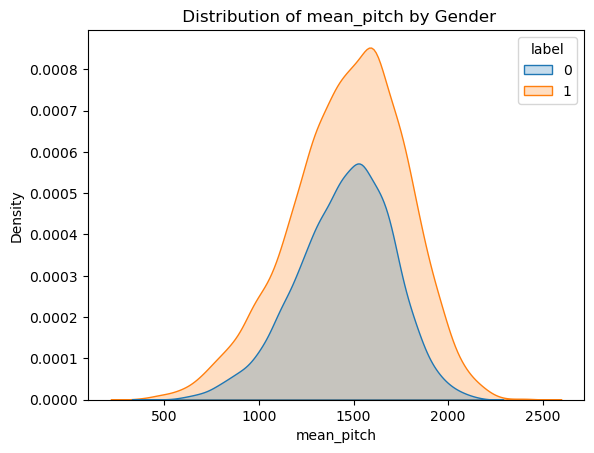

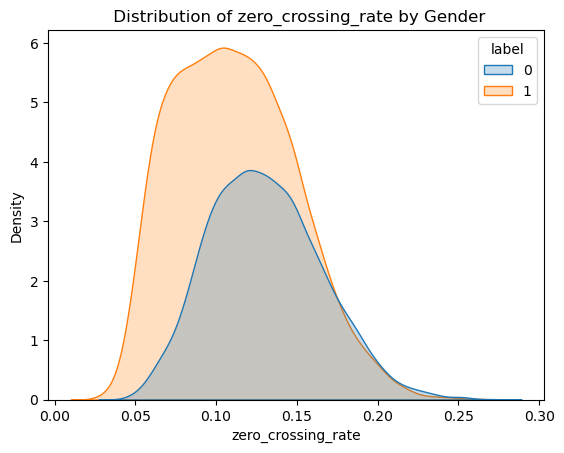

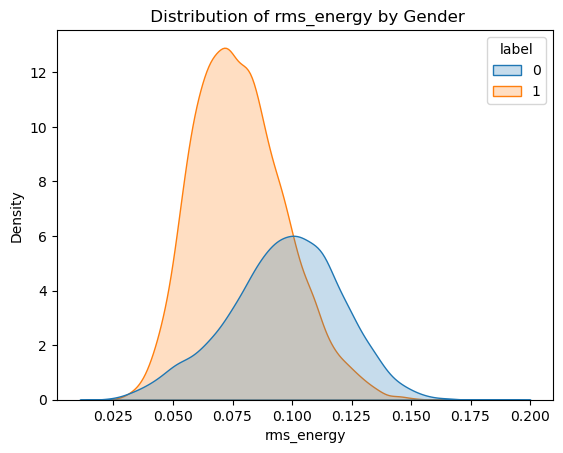

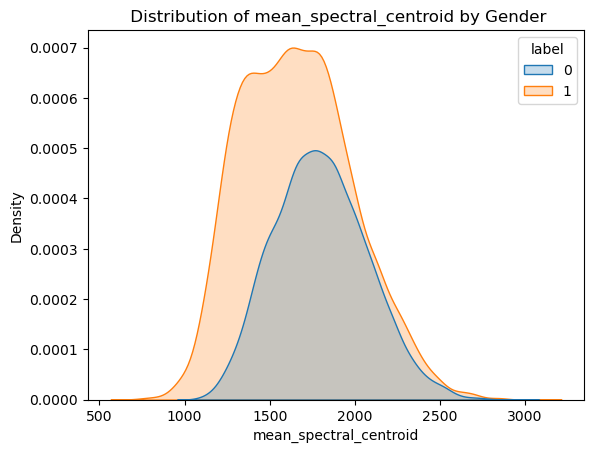

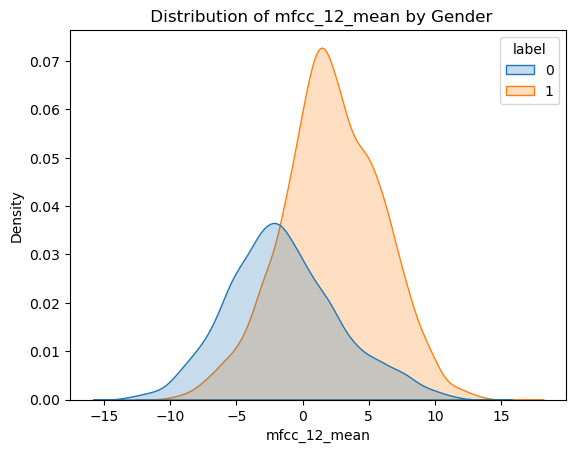

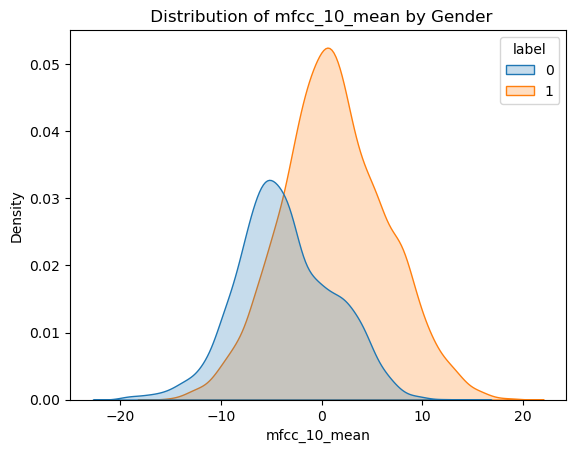

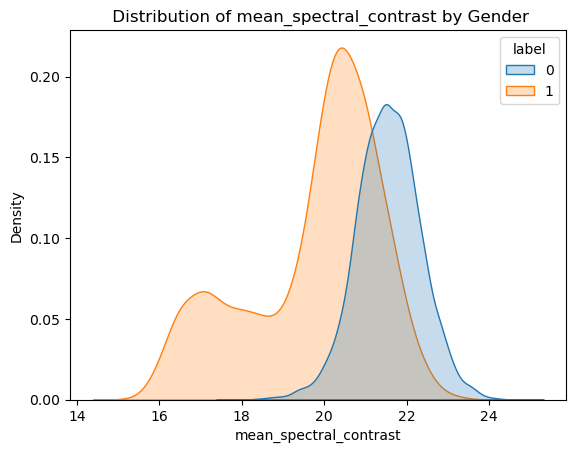

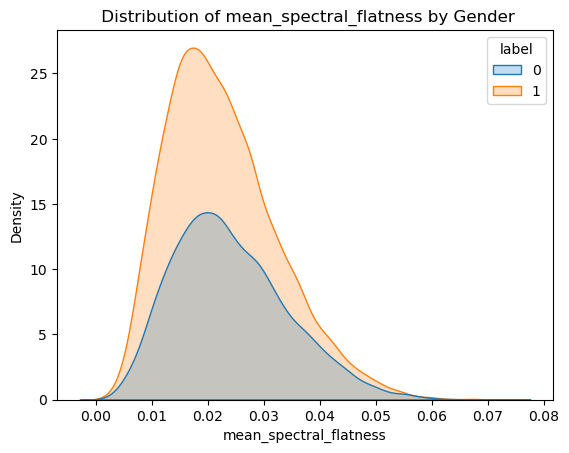

In [19]:
# Feature distribution

for col in ['mean_pitch', 'zero_crossing_rate', 'rms_energy', 'mean_spectral_centroid', 'mfcc_12_mean', 'mfcc_10_mean', 'mean_spectral_contrast', 'mean_spectral_flatness']:
    sns.kdeplot(data=df, x=col, hue='label', fill=True)
    plt.title(f' Distribution of {col} by Gender')
    plt.show()

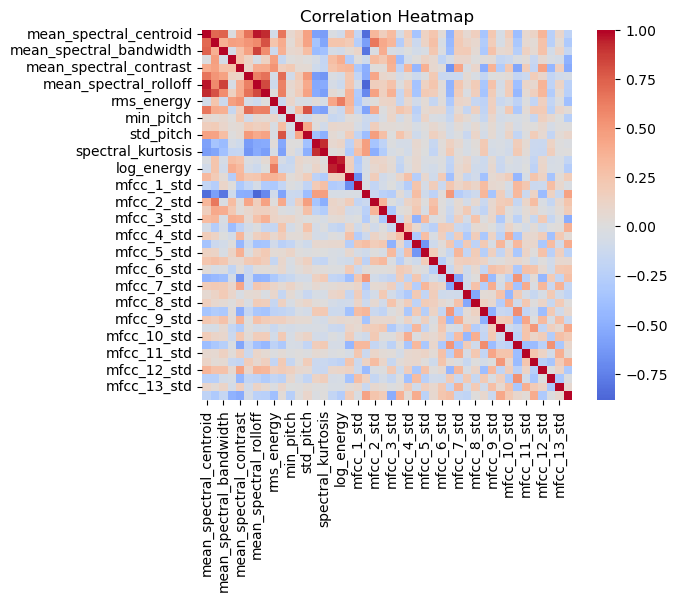

In [20]:
# Correlation Heatmap

corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, square=True)
plt.title("Correlation Heatmap")
plt.show()

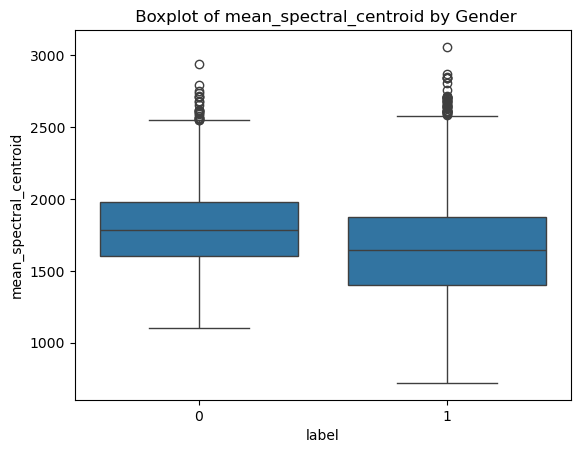

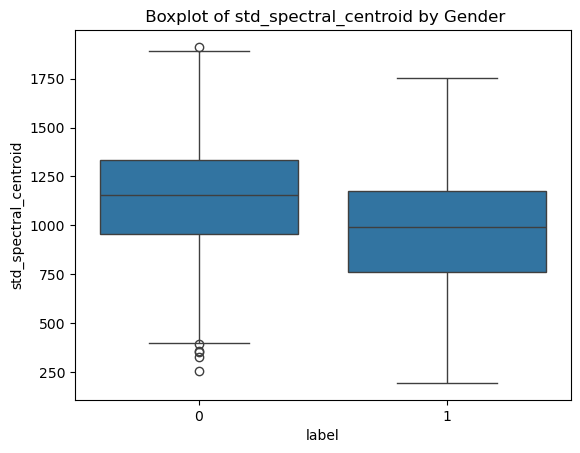

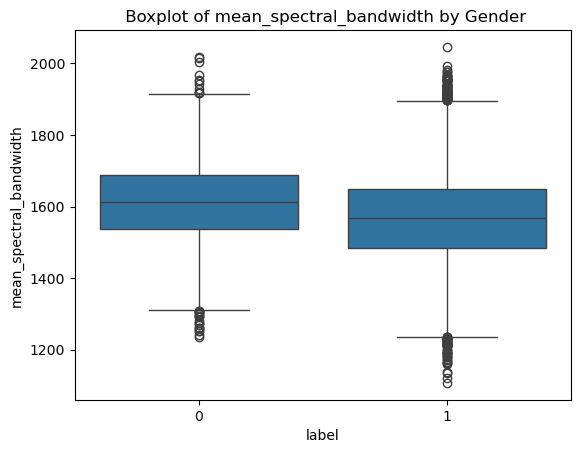

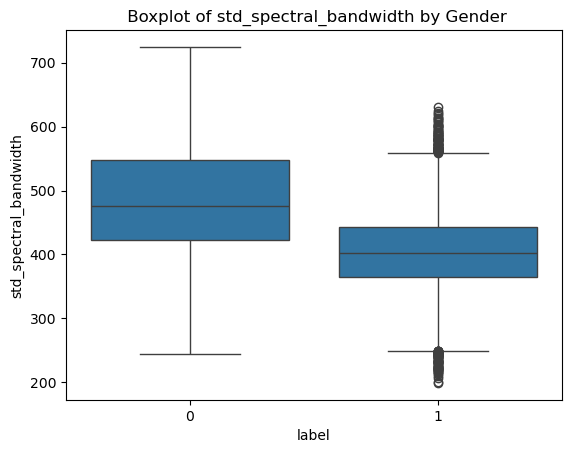

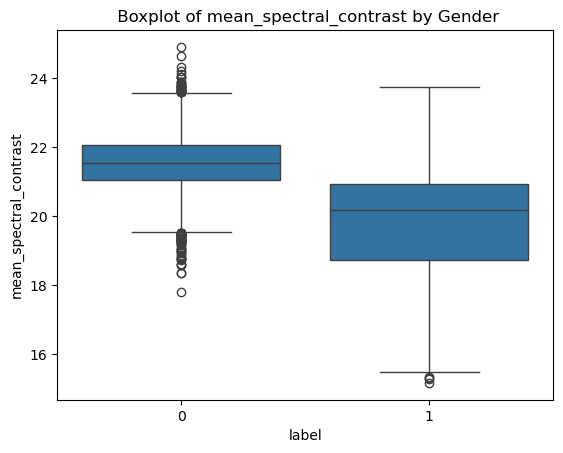

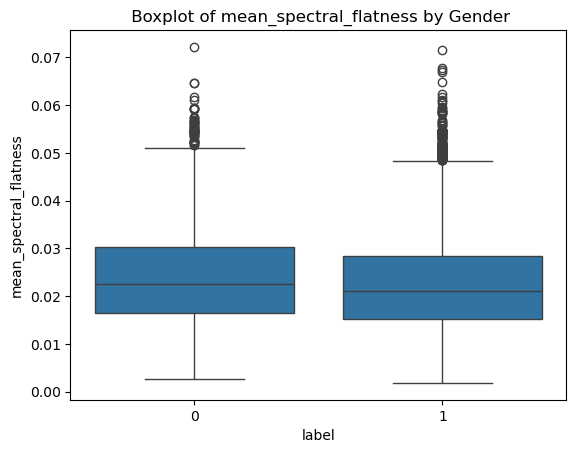

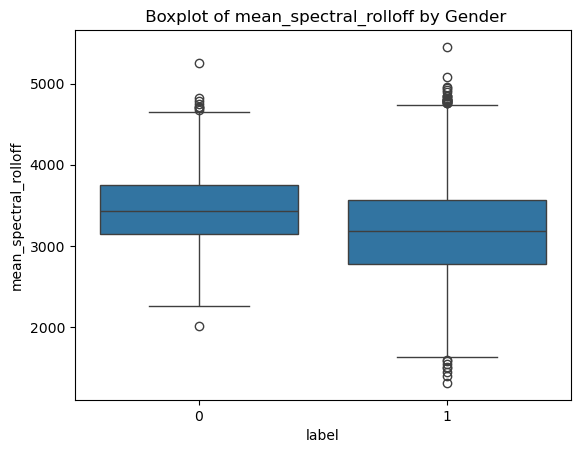

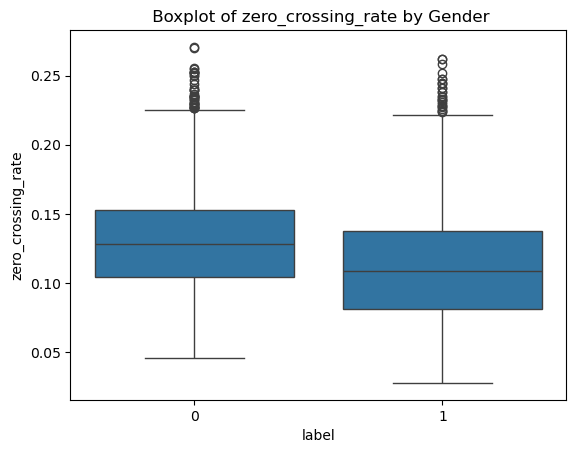

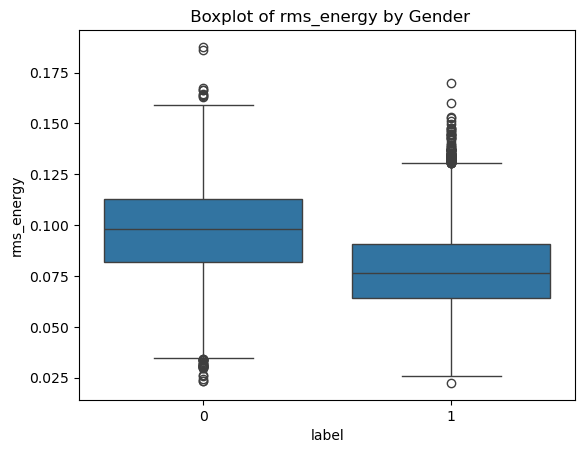

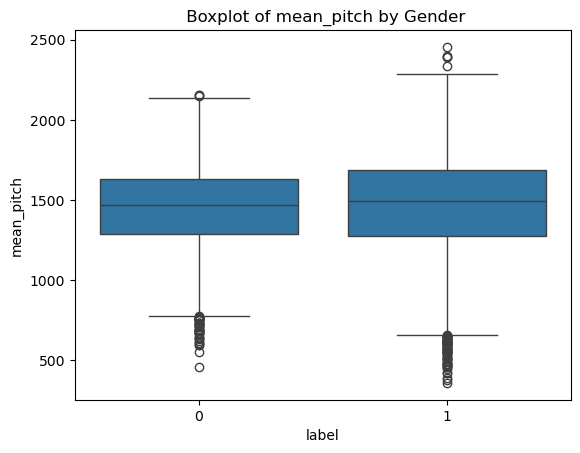

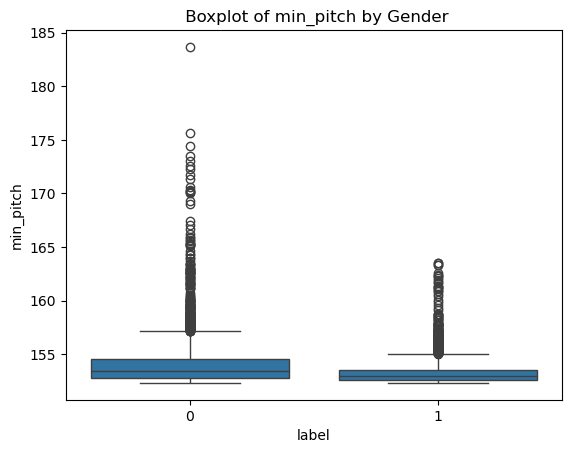

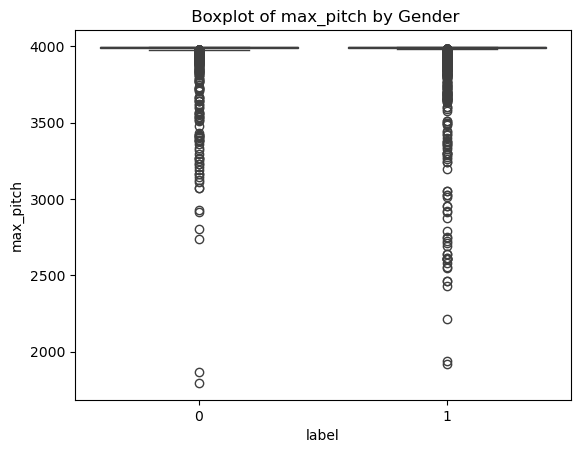

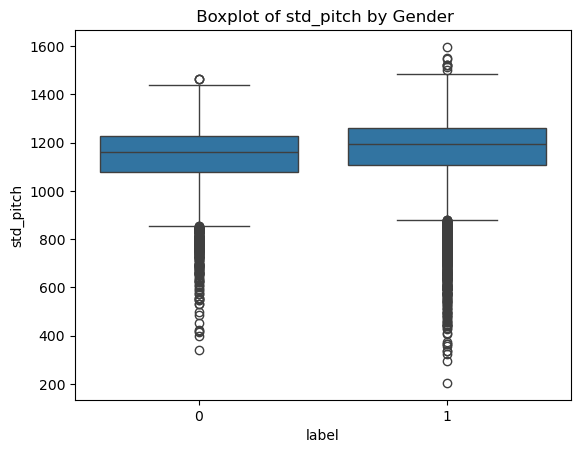

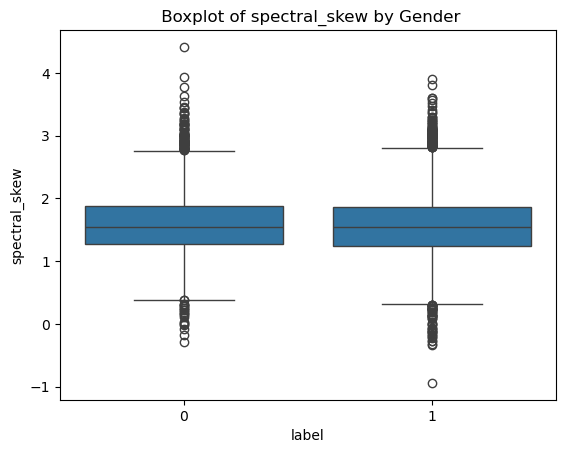

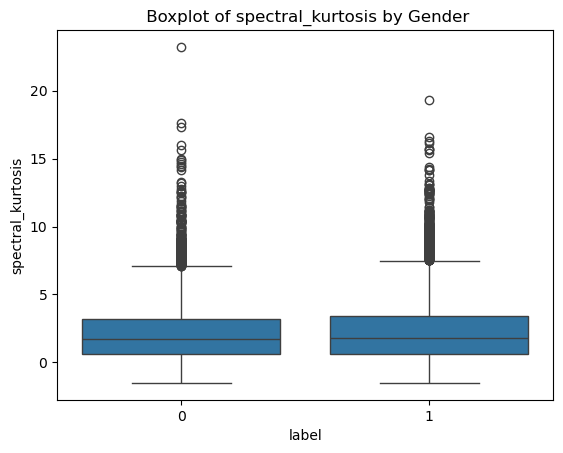

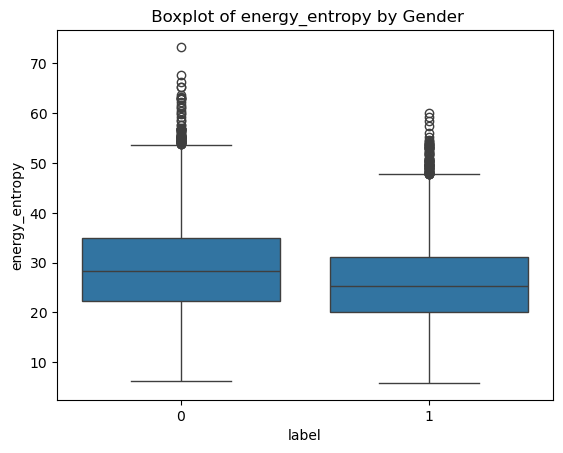

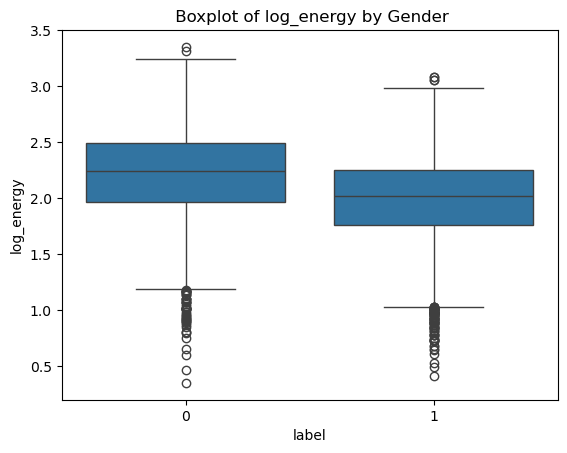

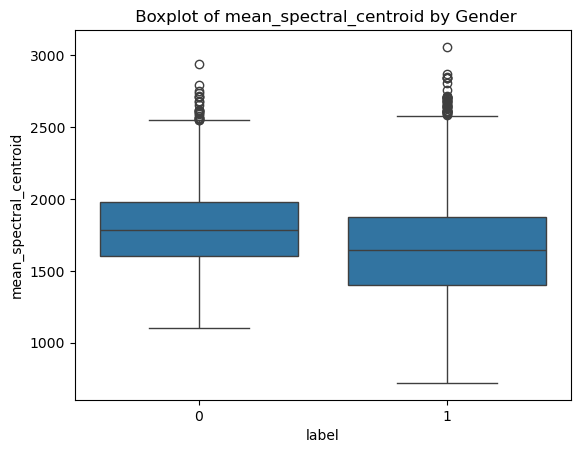

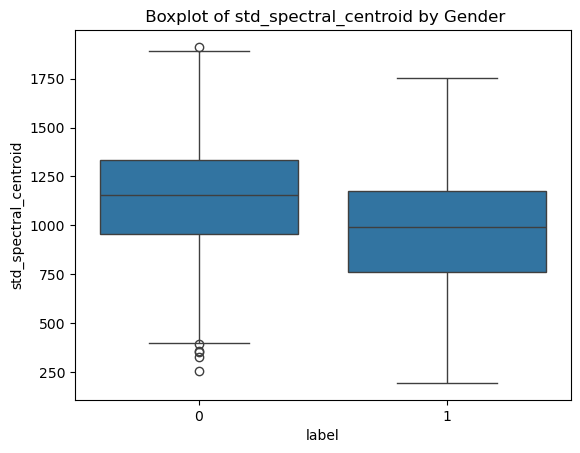

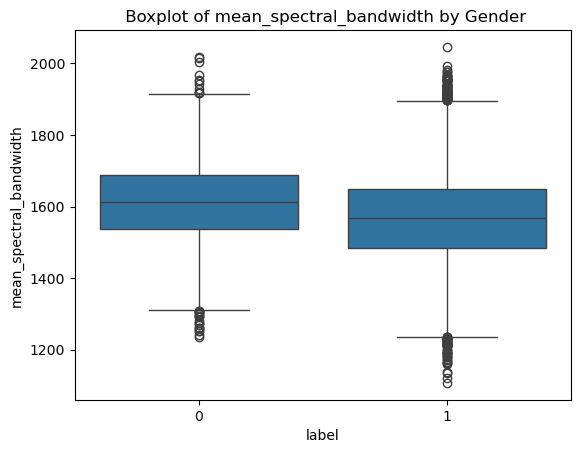

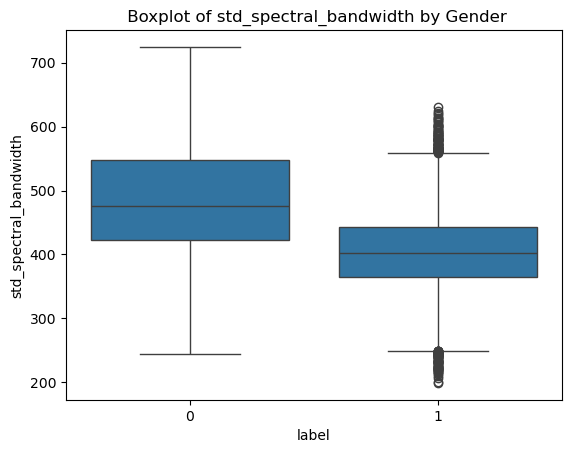

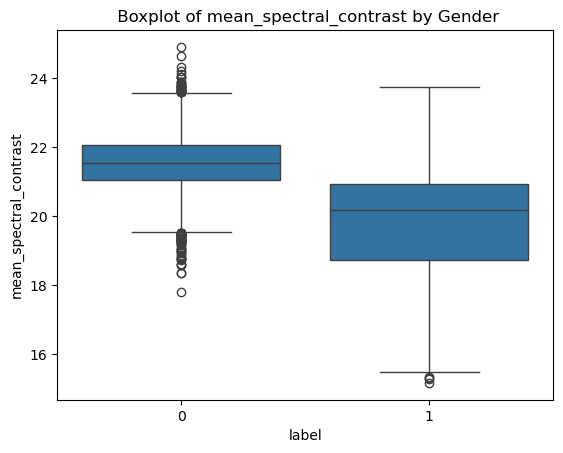

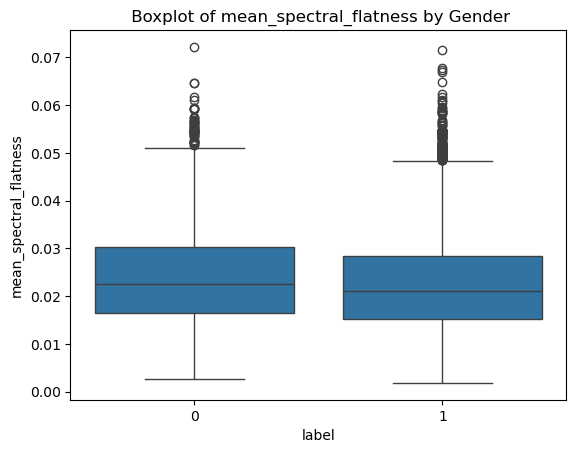

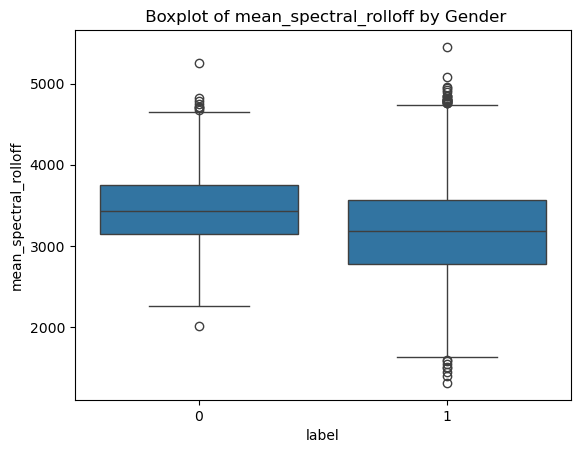

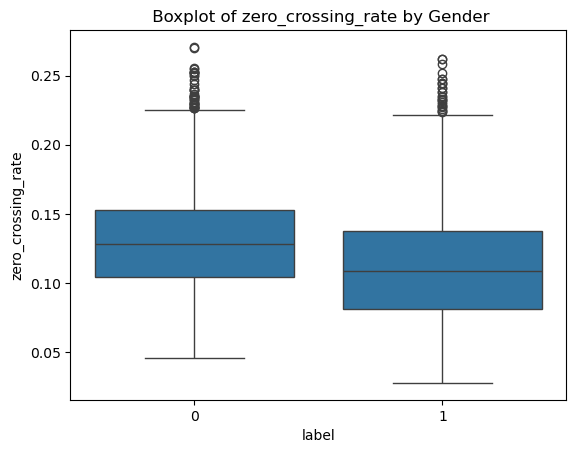

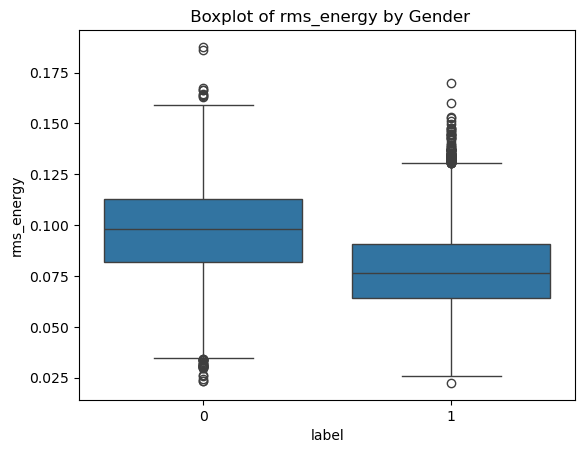

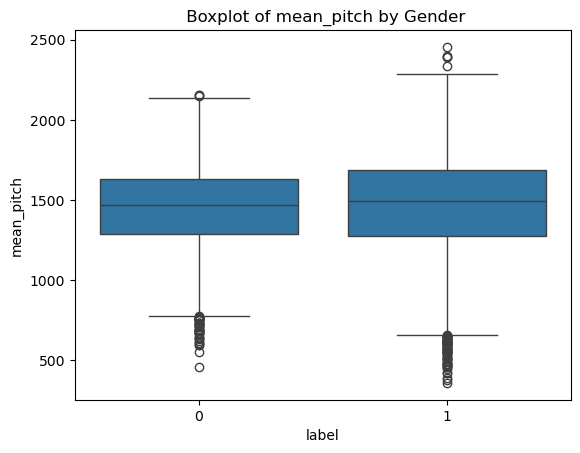

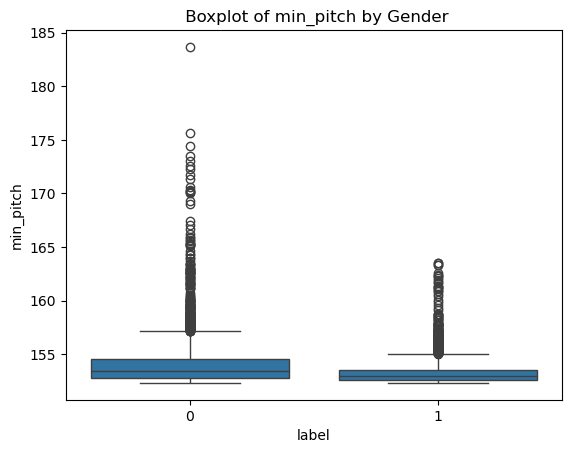

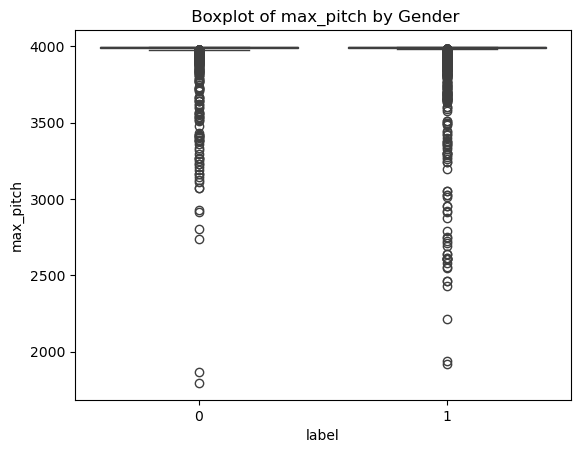

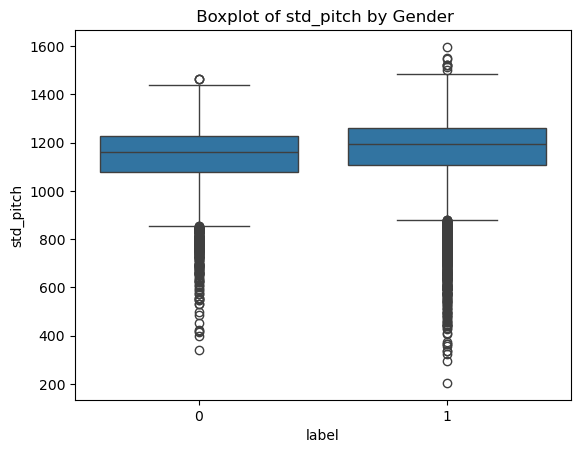

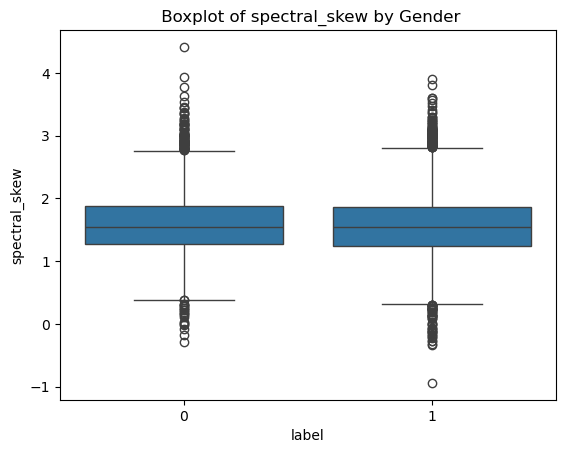

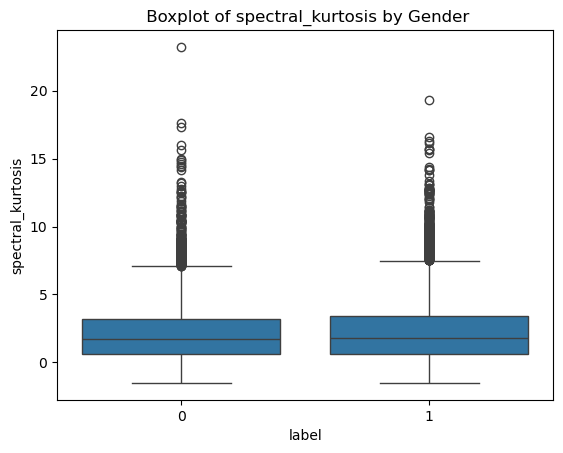

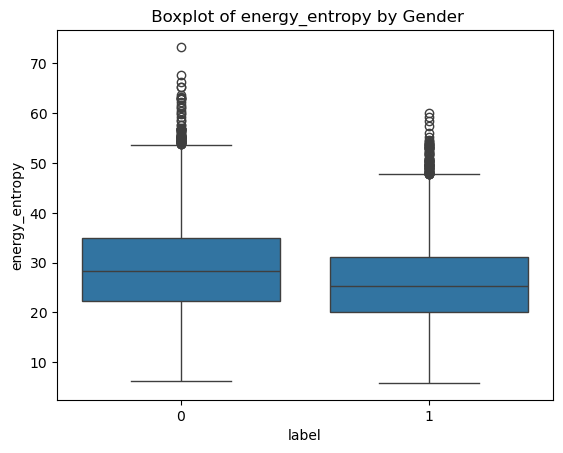

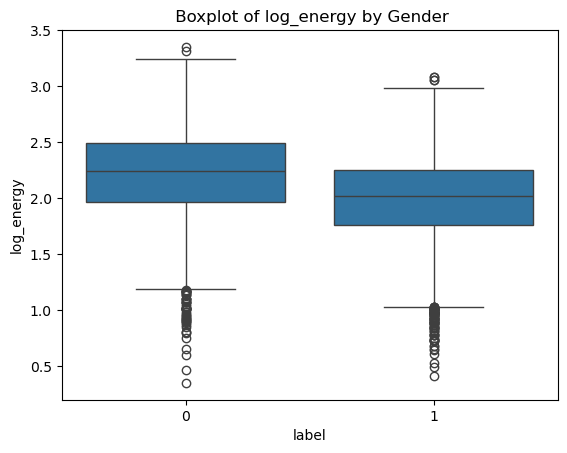

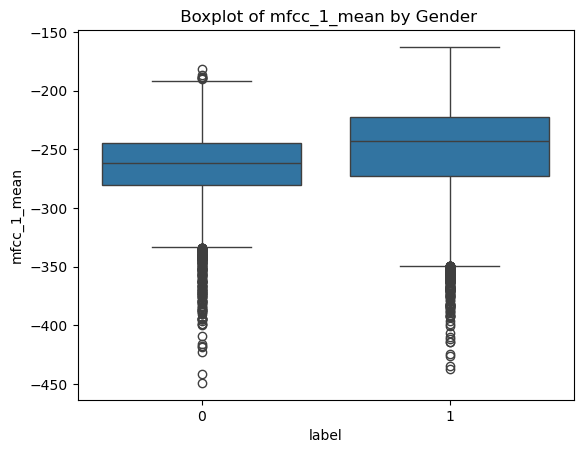

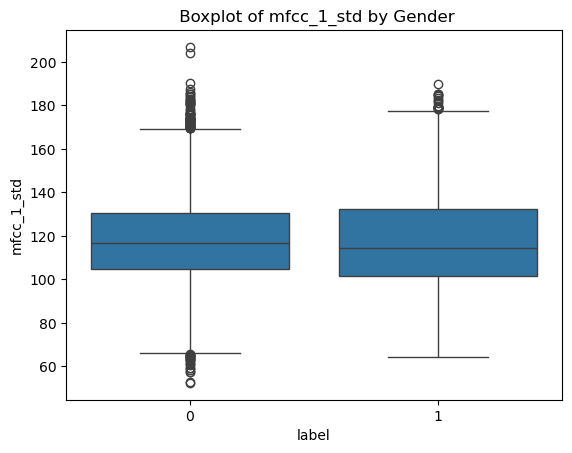

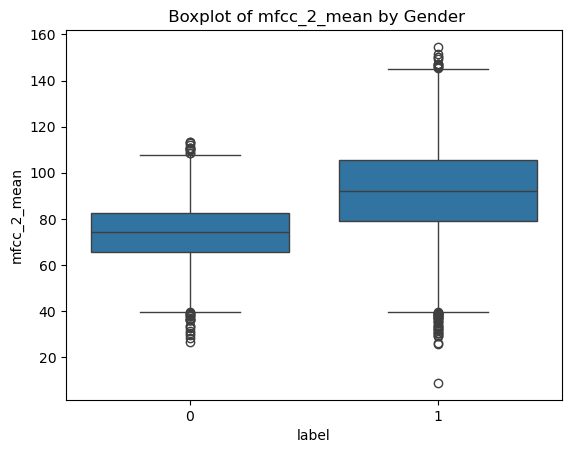

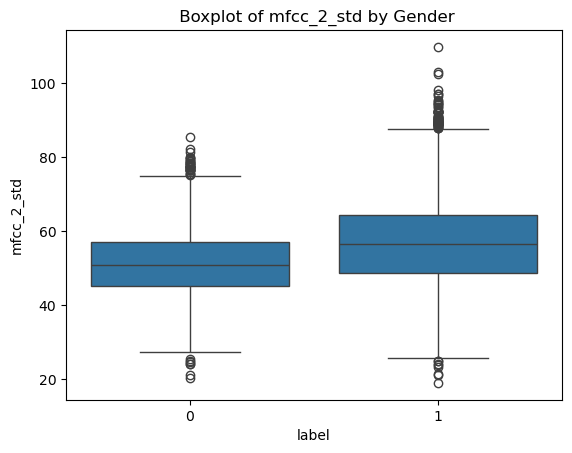

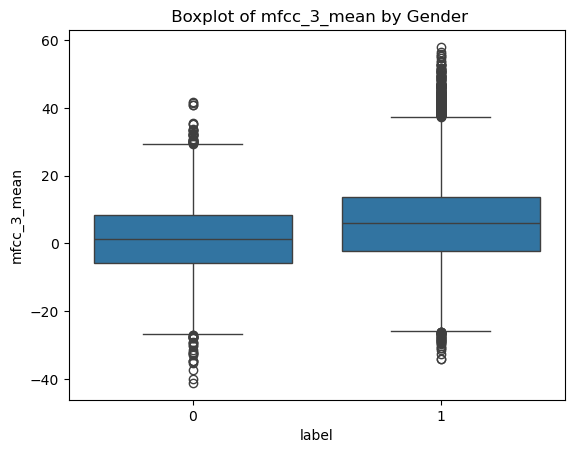

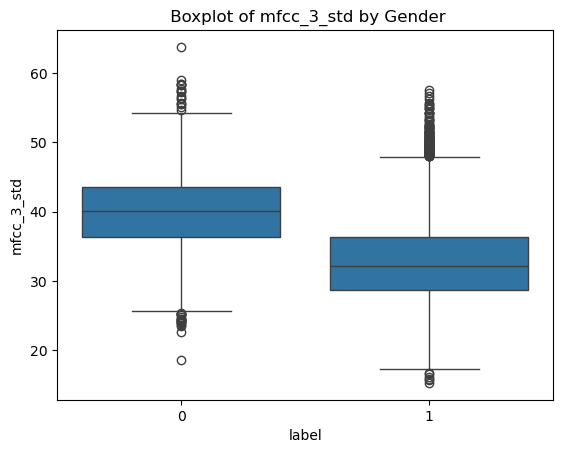

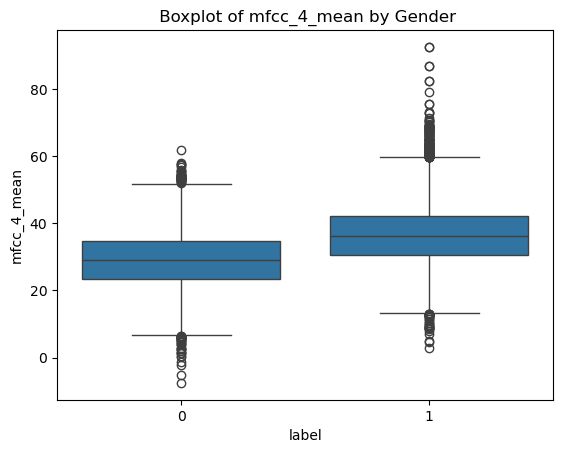

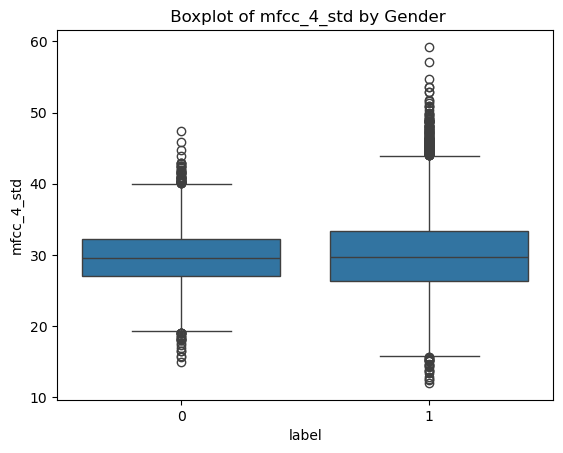

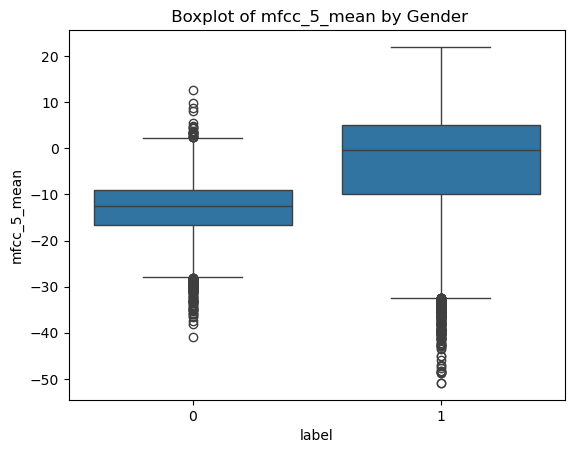

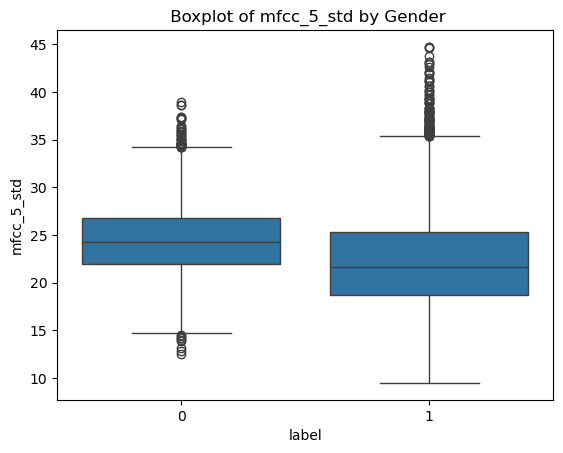

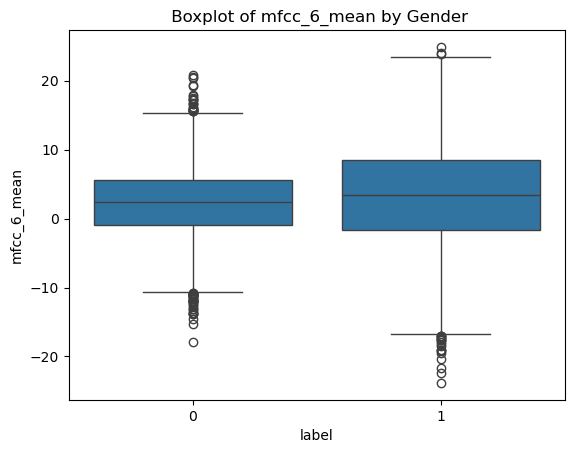

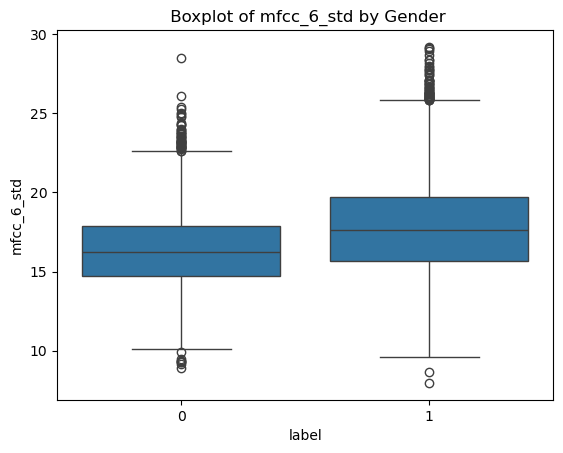

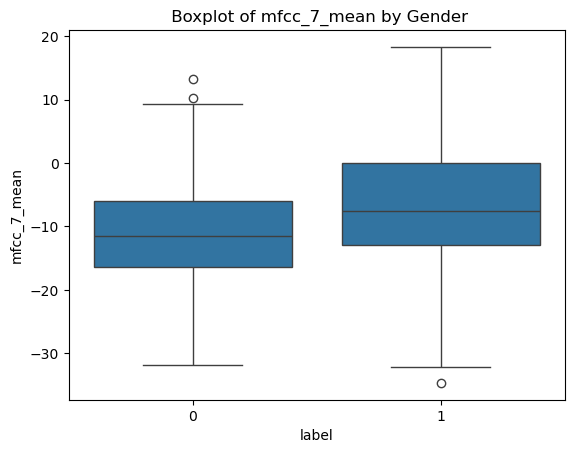

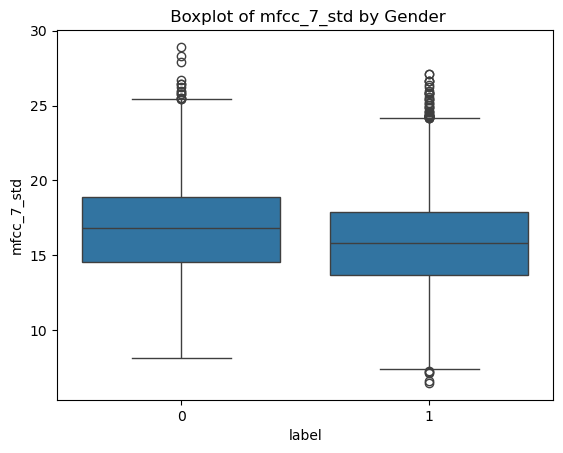

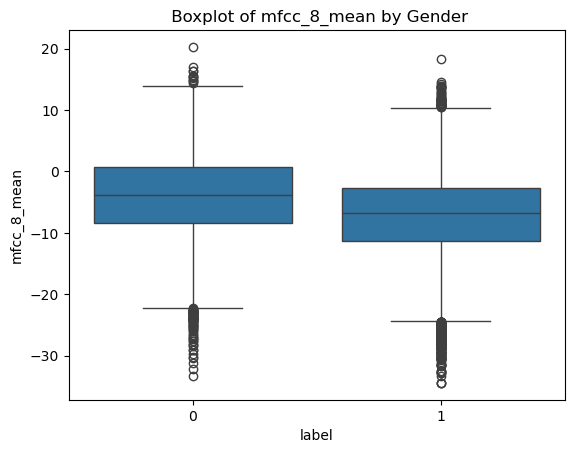

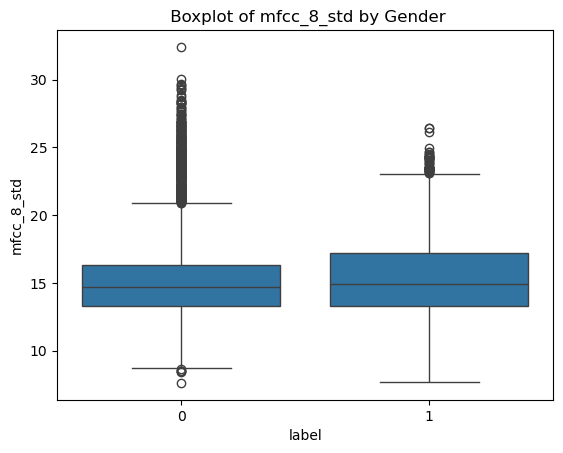

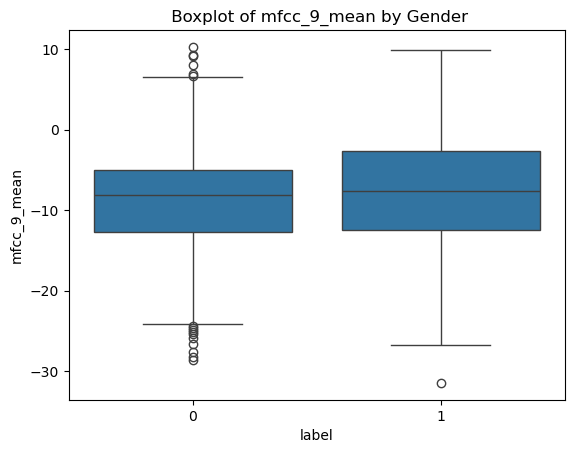

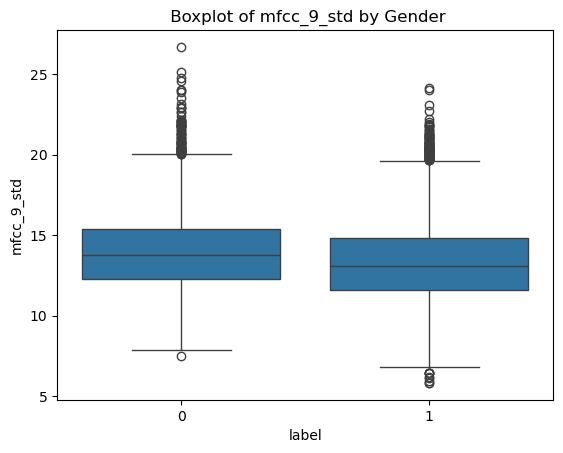

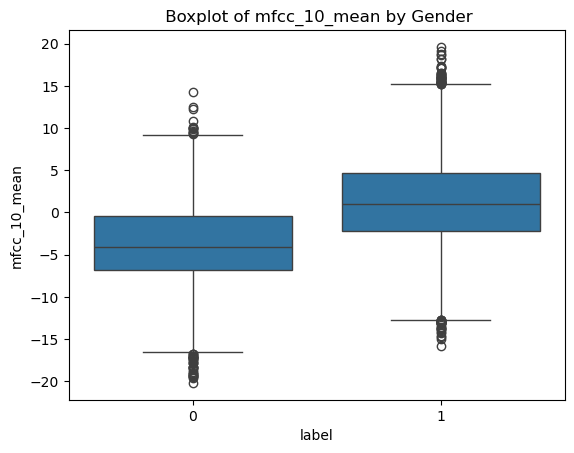

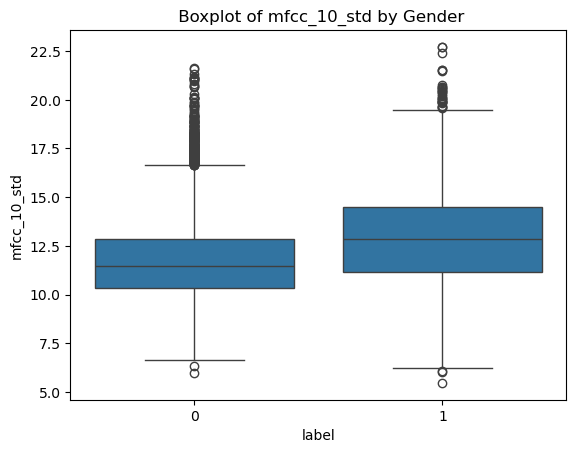

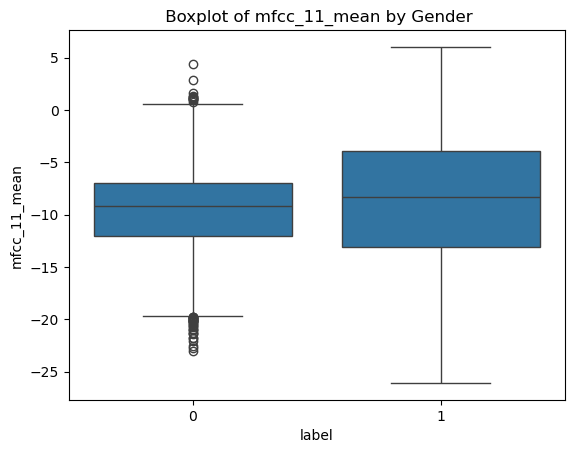

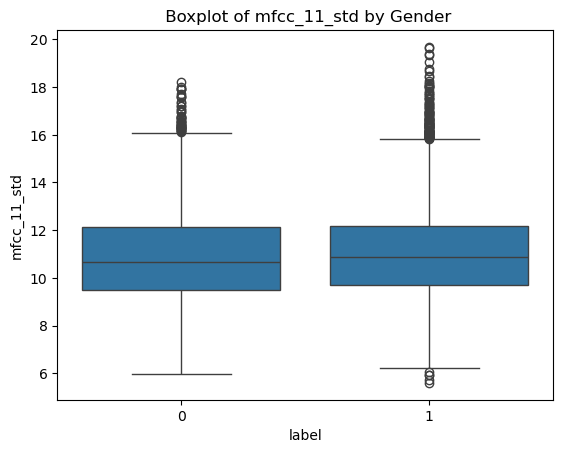

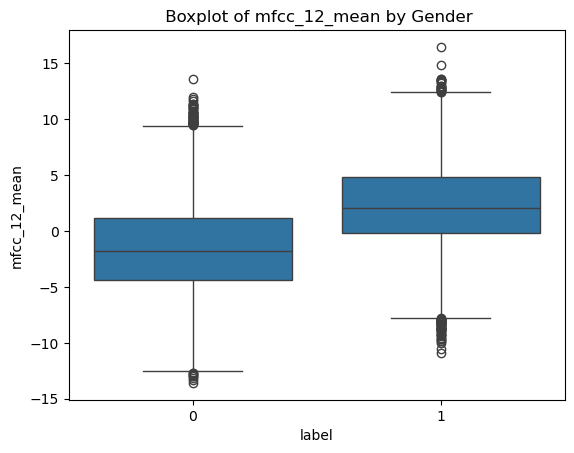

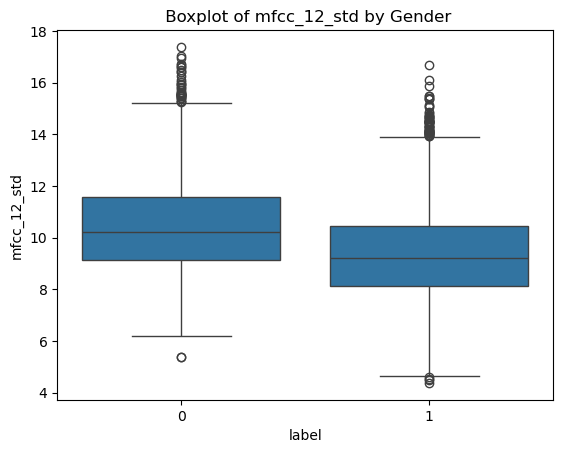

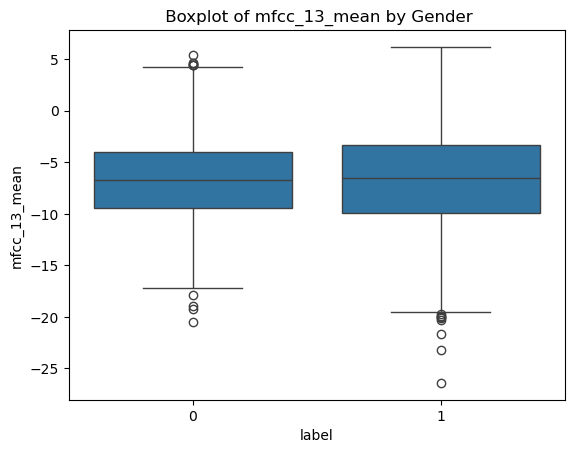

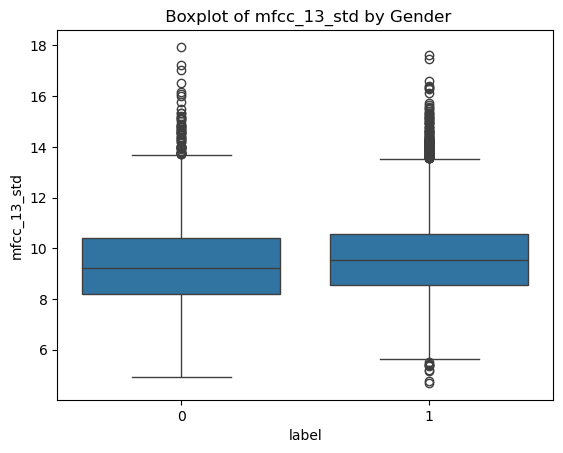

In [21]:
# Box plot

features = ['mean_spectral_centroid', 'std_spectral_centroid',
       'mean_spectral_bandwidth', 'std_spectral_bandwidth',
       'mean_spectral_contrast', 'mean_spectral_flatness',
       'mean_spectral_rolloff', 'zero_crossing_rate', 'rms_energy',
       'mean_pitch', 'min_pitch', 'max_pitch', 'std_pitch', 'spectral_skew',
       'spectral_kurtosis', 'energy_entropy', 'log_energy', 'mean_spectral_centroid', 'std_spectral_centroid',
       'mean_spectral_bandwidth', 'std_spectral_bandwidth',
       'mean_spectral_contrast', 'mean_spectral_flatness',
       'mean_spectral_rolloff', 'zero_crossing_rate', 'rms_energy',
       'mean_pitch', 'min_pitch', 'max_pitch', 'std_pitch', 'spectral_skew',
       'spectral_kurtosis', 'energy_entropy', 'log_energy', 'mfcc_1_mean',
       'mfcc_1_std', 'mfcc_2_mean', 'mfcc_2_std', 'mfcc_3_mean', 'mfcc_3_std',
       'mfcc_4_mean', 'mfcc_4_std', 'mfcc_5_mean', 'mfcc_5_std', 'mfcc_6_mean',
       'mfcc_6_std', 'mfcc_7_mean', 'mfcc_7_std', 'mfcc_8_mean', 'mfcc_8_std',
       'mfcc_9_mean', 'mfcc_9_std', 'mfcc_10_mean', 'mfcc_10_std',
       'mfcc_11_mean', 'mfcc_11_std', 'mfcc_12_mean', 'mfcc_12_std',
       'mfcc_13_mean', 'mfcc_13_std']
for feature in features:
    sns.boxplot(x='label', y=feature, data=df)
    plt.title(f' Boxplot of {feature} by Gender')
    plt.show()

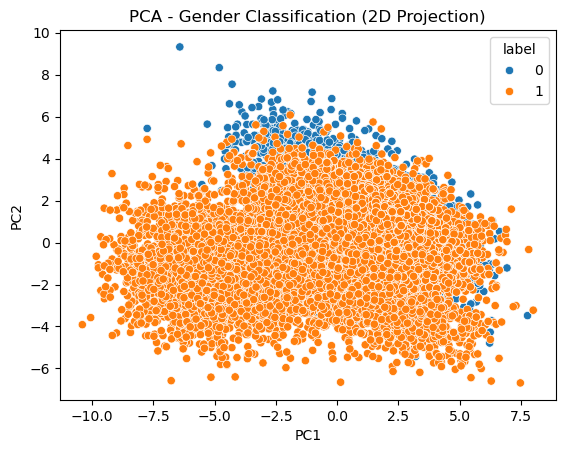

In [22]:
# 
X = df.drop('label', axis=1)
y = df['label']
X_scaled = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y)
plt.title('PCA - Gender Classification (2D Projection)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


## Finding and Treating Outleyeres

In [24]:
# Treating the Outliers with IQR (Interquartile Range) Method

# Since we have 44 features, creating a dictionary and loop
# creating  dictionary
outlier_summary = {}

# Loop through all numeric features except 'label'
for col in df.select_dtypes(include='number').columns:
    if col != 'label':
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Outlier bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Count outliers 
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_count = outliers.shape[0]
        outlier_summary[col] = outlier_count

# Display the summary
outlier_summary_df = pd.DataFrame.from_dict(outlier_summary, orient='index', columns=['Outlier Count'])
outlier_summary_df = outlier_summary_df.sort_values(by='Outlier Count', ascending=False)
print(outlier_summary_df)          


                         Outlier Count
max_pitch                         1690
mean_spectral_contrast            1158
min_pitch                          827
std_pitch                          659
spectral_kurtosis                  590
mfcc_8_mean                        516
mfcc_3_mean                        423
mfcc_8_std                         413
mfcc_4_std                         315
mfcc_1_mean                        303
spectral_skew                      297
mfcc_4_mean                        237
std_spectral_bandwidth             217
mfcc_9_std                         201
mfcc_13_std                        201
mean_spectral_flatness             201
energy_entropy                     186
mfcc_6_std                         178
mean_spectral_bandwidth            173
mfcc_11_std                        162
mfcc_2_std                         159
mfcc_12_std                        150
log_energy                         146
mean_pitch                         144
mfcc_5_std               

In [25]:
# Treating the Outliers
# by Clipping

In [26]:


for col in df.select_dtypes(include='number').columns:
    if col != 'label':
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Clip values to the IQR bounds
        df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

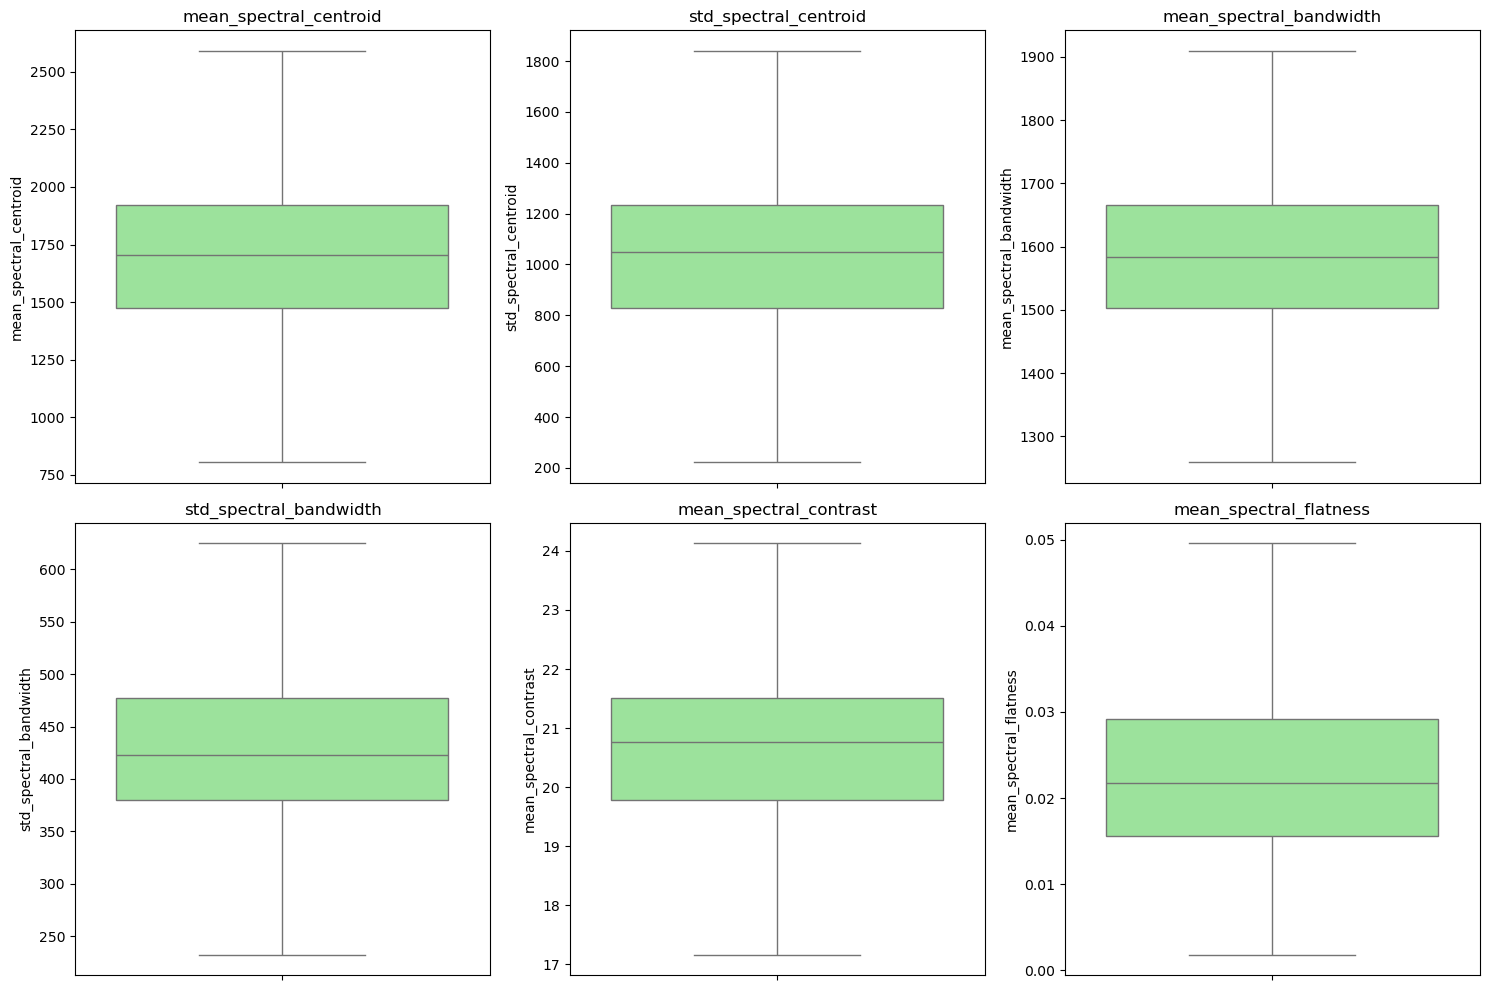

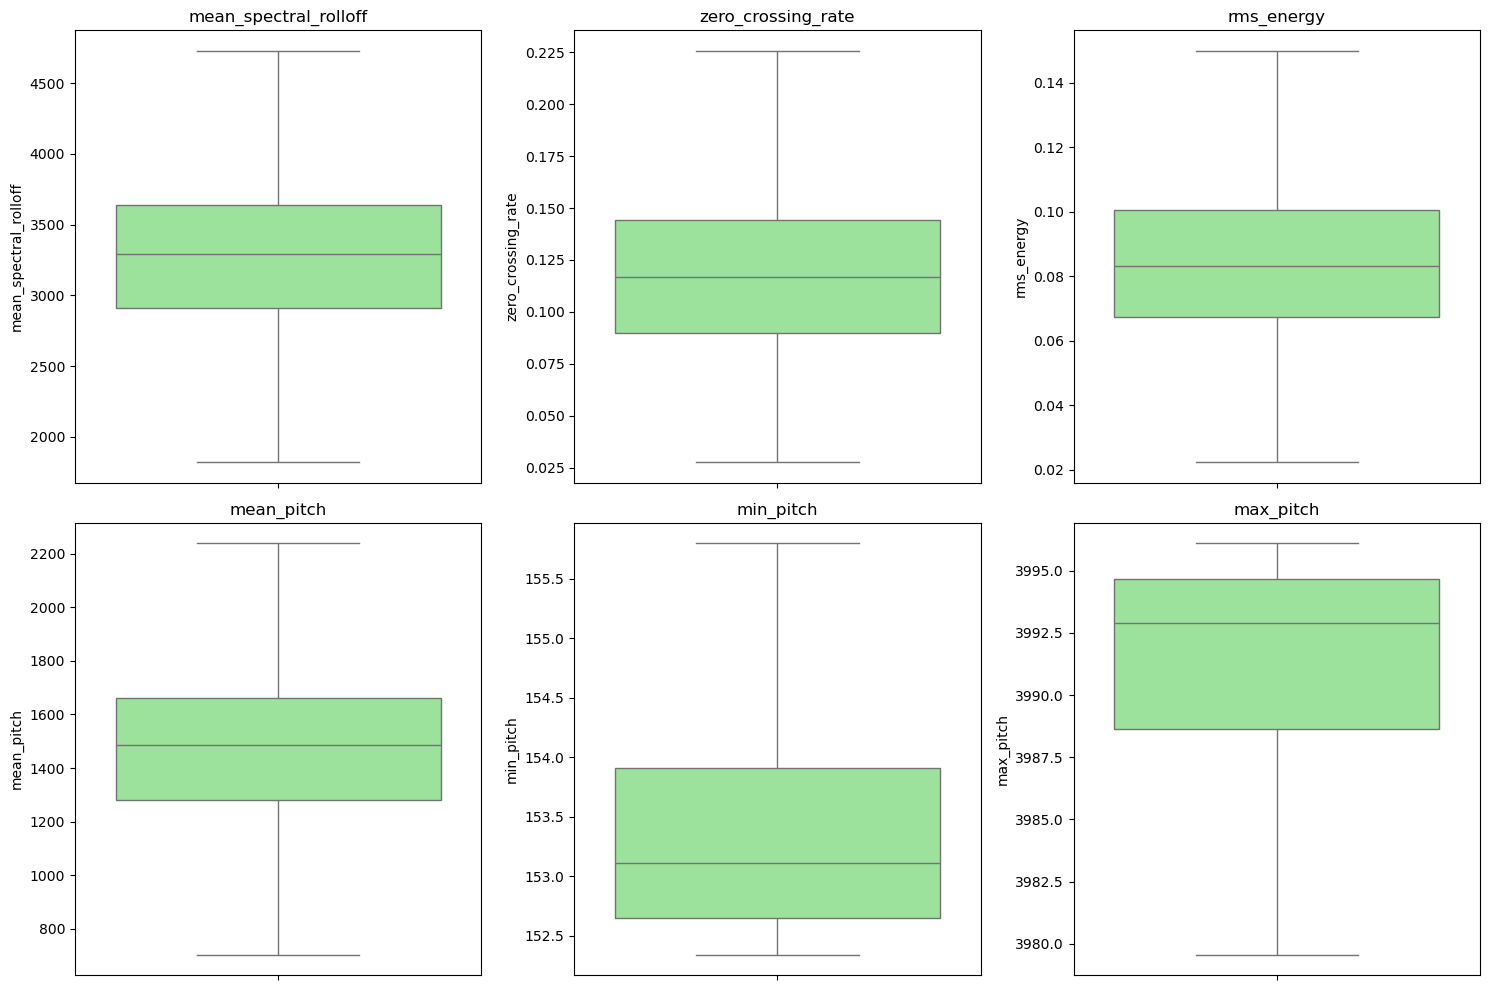

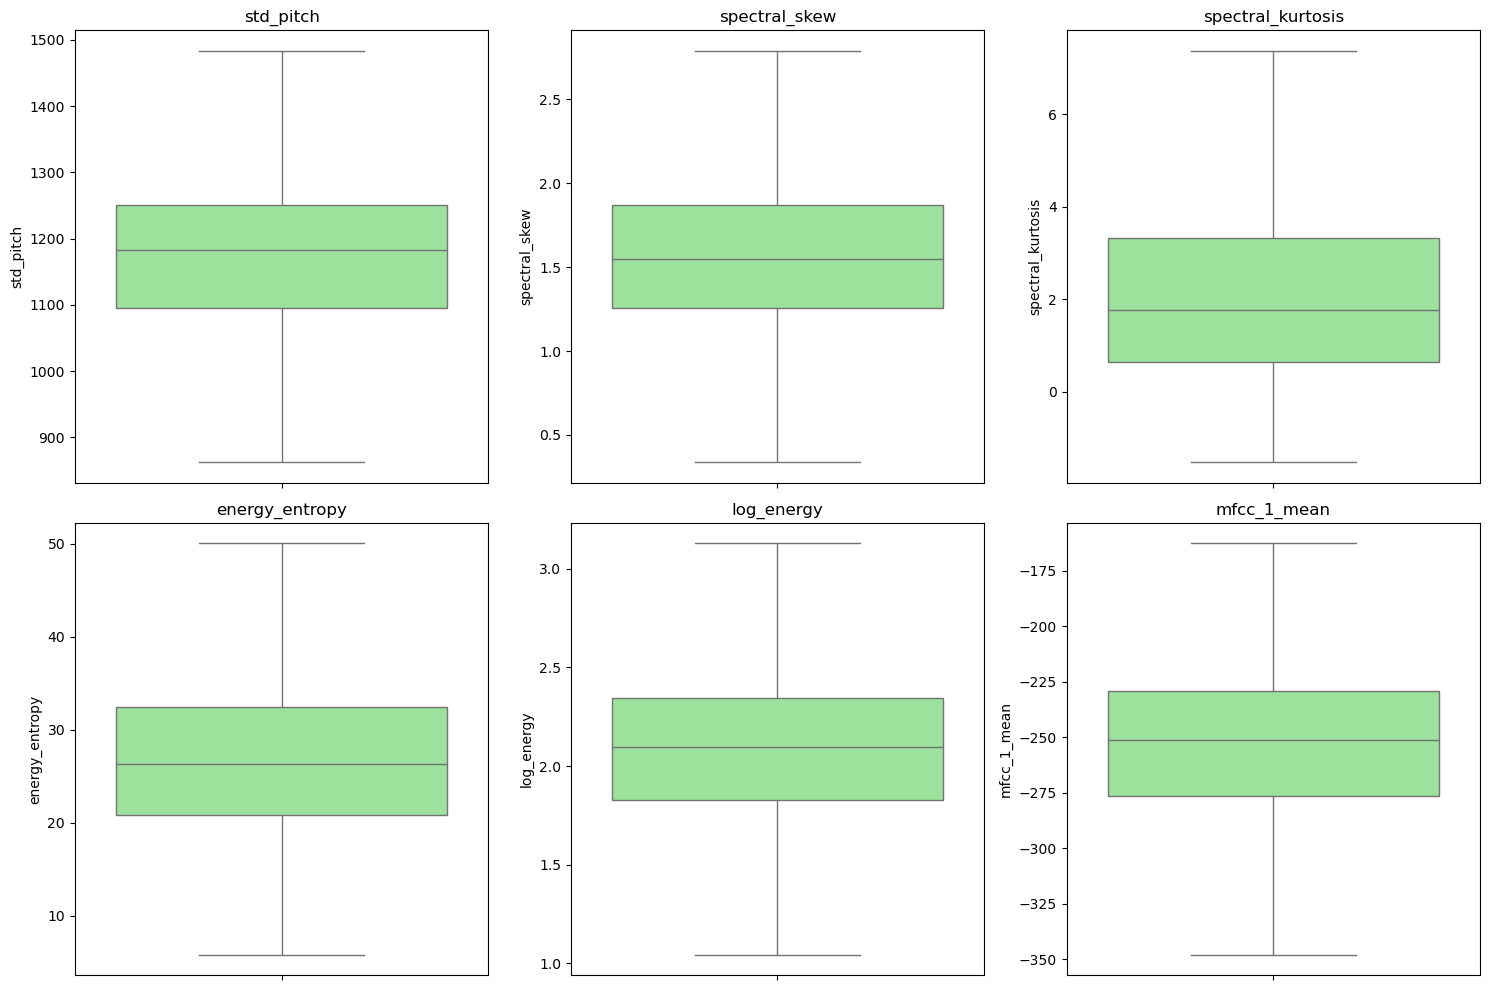

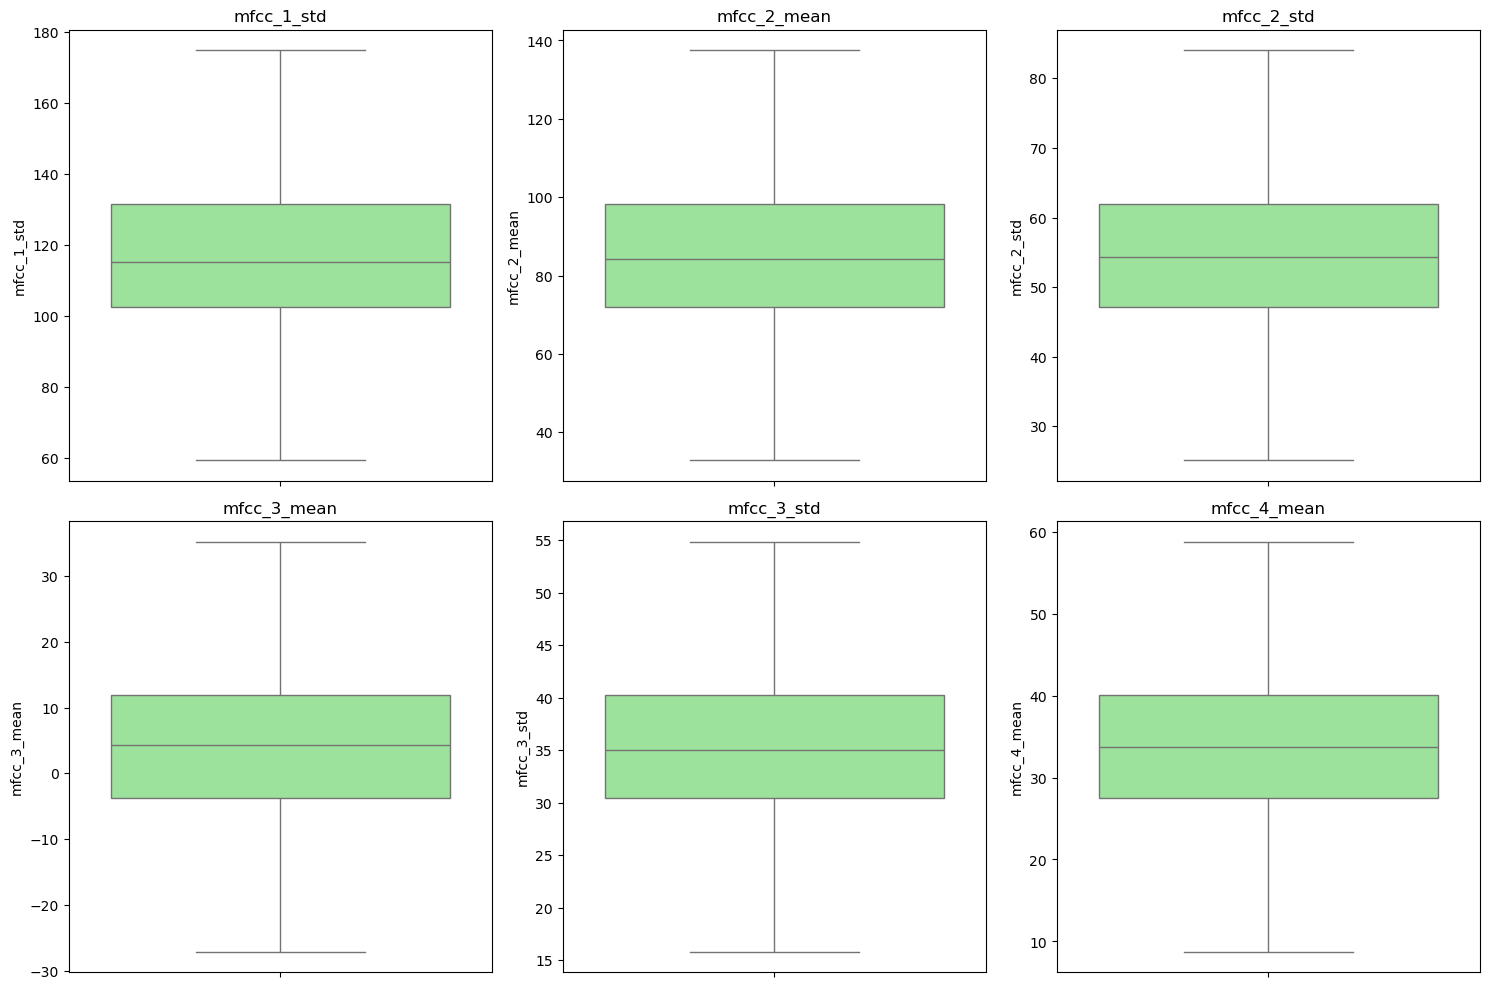

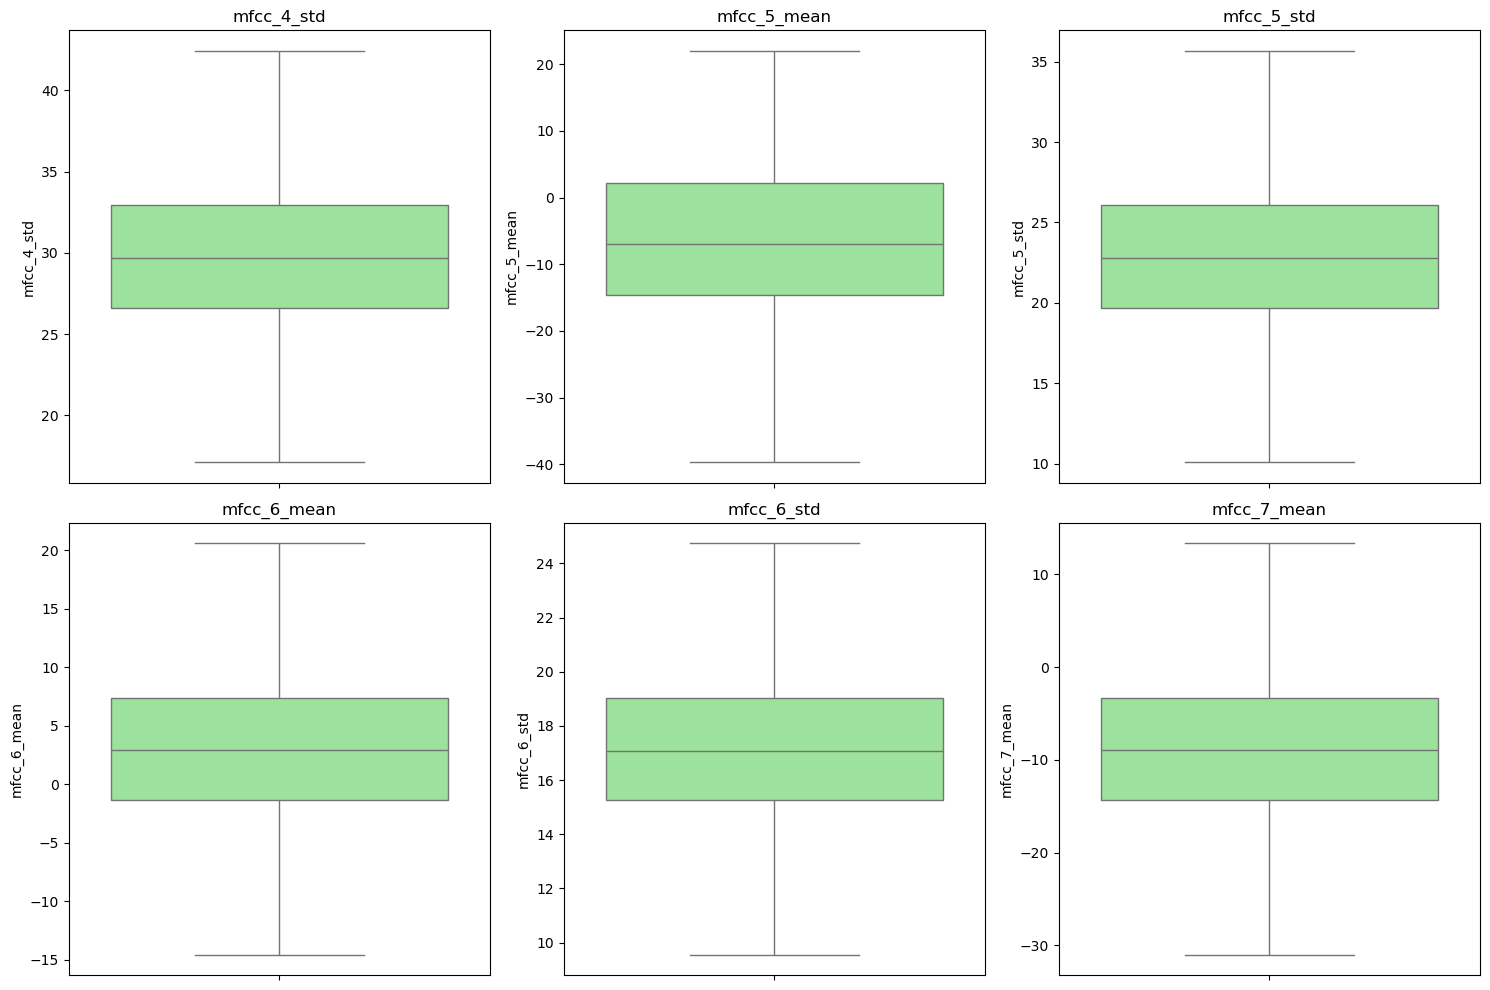

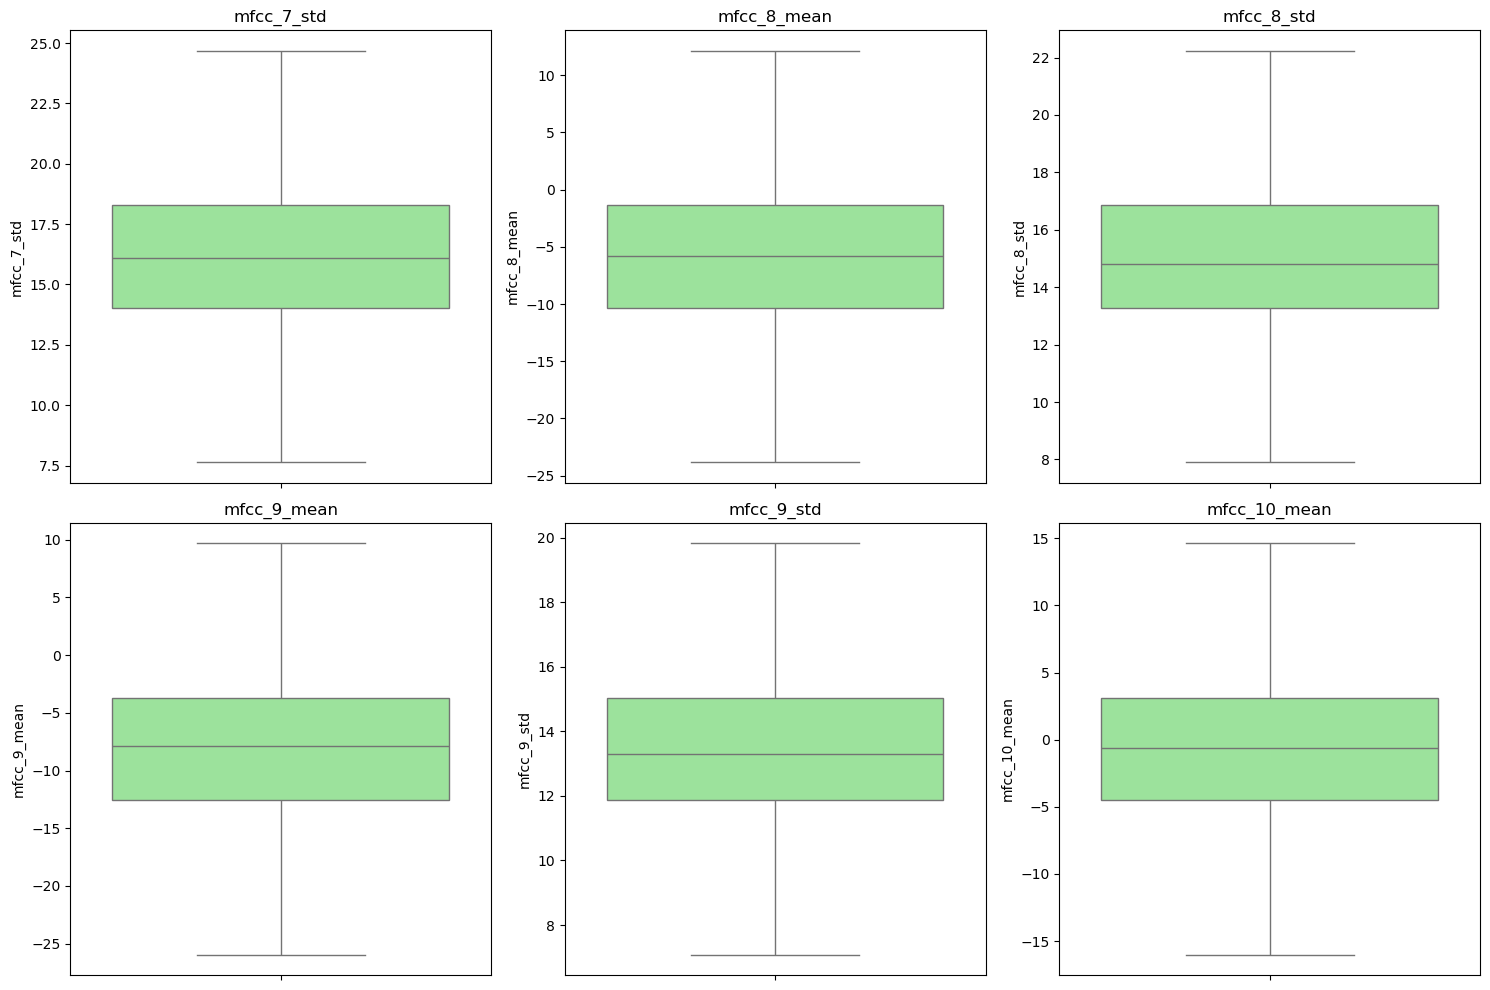

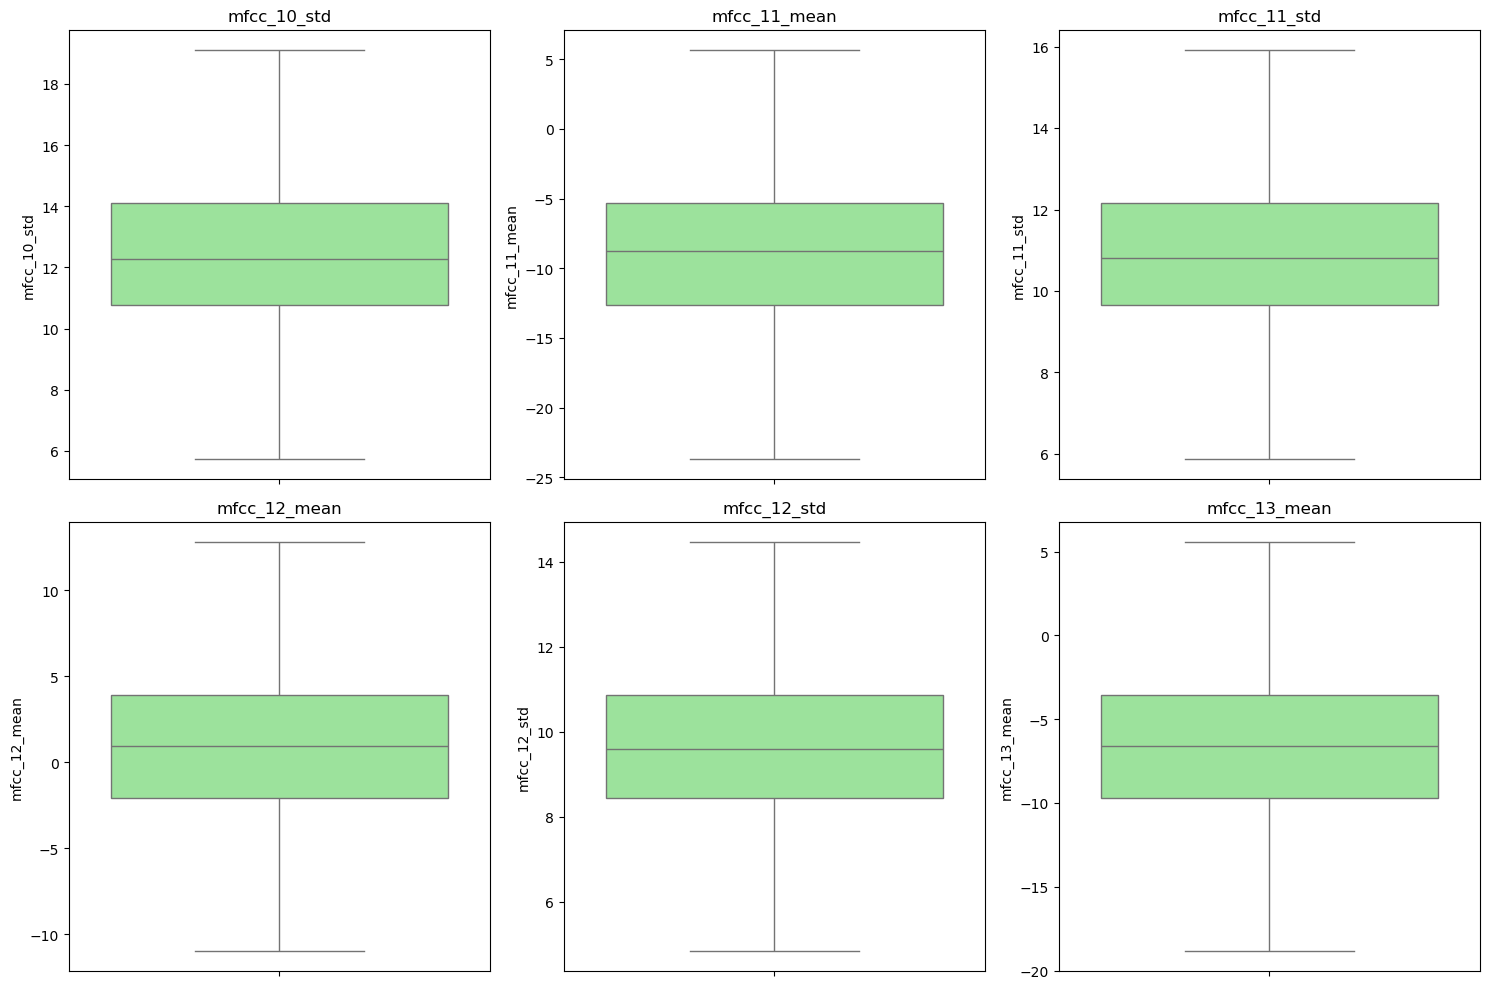

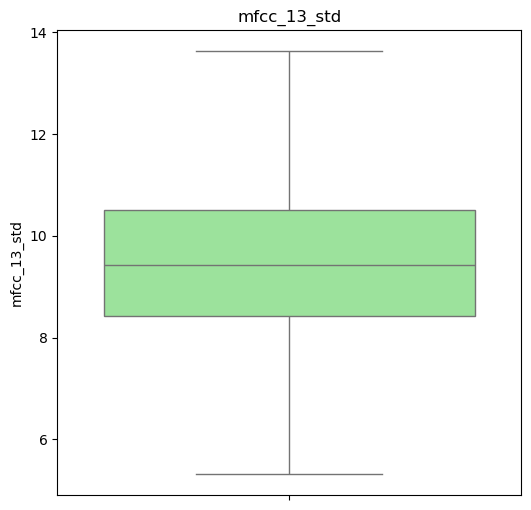

In [27]:
# Checking outliers again 

num_cols = df.select_dtypes(include='number').columns.drop('label')
cols = list(num_cols)
batch_size = 6

for i in range(0, len(cols), batch_size):
    plt.figure(figsize=(15, 10))
    for j, col in enumerate(cols[i:i+batch_size], 1):
        plt.subplot(2, 3, j)
        sns.boxplot(y=df[col], color='lightgreen')
        plt.title(f'{col}')
    plt.tight_layout()
    plt.show()

     

In [28]:
outlier_summary = {}

# Loop through all numeric features except 'label'
for col in df.select_dtypes(include='number').columns:
    if col != 'label':
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Outlier bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Count outliers 
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_count = outliers.shape[0]
        outlier_summary[col] = outlier_count

# Display the summary
outlier_summary_df = pd.DataFrame.from_dict(outlier_summary, orient='index', columns=['Outlier Count'])
outlier_summary_df = outlier_summary_df.sort_values(by='Outlier Count', ascending=False)
print(outlier_summary_df)


                         Outlier Count
mean_spectral_centroid               0
mfcc_8_std                           0
mfcc_4_std                           0
mfcc_5_mean                          0
mfcc_5_std                           0
mfcc_6_mean                          0
mfcc_6_std                           0
mfcc_7_mean                          0
mfcc_7_std                           0
mfcc_8_mean                          0
mfcc_9_mean                          0
mfcc_3_std                           0
mfcc_9_std                           0
mfcc_10_mean                         0
mfcc_10_std                          0
mfcc_11_mean                         0
mfcc_11_std                          0
mfcc_12_mean                         0
mfcc_12_std                          0
mfcc_13_mean                         0
mfcc_4_mean                          0
mfcc_3_mean                          0
std_spectral_centroid                0
min_pitch                            0
mean_spectral_bandwidth  

# Checking for Skewness

In [30]:
# checking for skewness for all values excluding label

# Select numerical columns (excluding 'label')
numerical_cols = df.select_dtypes(include='number').columns
numerical_cols = [col for col in numerical_cols if col != 'label']

# Compute skewness
skewness = df[numerical_cols].skew().sort_values(ascending=False)

# Display skewness
print(skewness)

min_pitch                  1.074262
spectral_kurtosis          0.844685
mfcc_8_std                 0.575714
mean_spectral_flatness     0.567877
energy_entropy             0.412202
mfcc_11_std                0.403751
mfcc_1_std                 0.384331
mfcc_10_std                0.375564
std_spectral_bandwidth     0.373137
mfcc_7_mean                0.348044
mfcc_9_std                 0.337634
mfcc_6_std                 0.323996
mfcc_13_std                0.317542
mfcc_12_std                0.302290
rms_energy                 0.301938
mfcc_2_std                 0.275101
zero_crossing_rate         0.270659
mfcc_4_std                 0.265117
spectral_skew              0.248367
mfcc_5_std                 0.241978
mfcc_3_std                 0.195223
mean_spectral_centroid     0.185446
mfcc_2_mean                0.172326
mfcc_3_mean                0.165492
mfcc_10_mean               0.118968
mfcc_7_std                 0.118733
mfcc_4_mean                0.106530
mean_spectral_rolloff      0

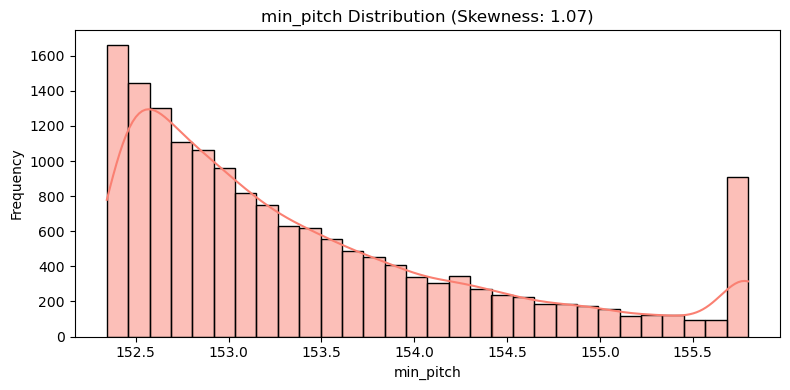

In [31]:
# Skewness Visualisation using Histo Plot

# Plot top 5 most skewed features
top_skewed = skewness[skewness > 1][:5]  # Highly right-skewed

for col in top_skewed.index:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30, color='salmon')
    plt.title(f'{col} Distribution (Skewness: {df[col].skew():.2f})')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

In [32]:
# Treating the Skewness
df['min_pitch_log'] = np.log(df['min_pitch'])
print("Skewness after log:", df['min_pitch_log'].skew())

Skewness after log: 1.0643919318059623


In [33]:
# Checking min Max to dcide which meathod should apply
print("Min value:", df['min_pitch'].min())
print("Any zeros?:", (df['min_pitch'] == 0).sum())


Min value: 152.34375
Any zeros?: 0


In [34]:
df['min_pitch_log'] = np.log(df['min_pitch'])
print("Skewness after log:", df['min_pitch_log'].skew())

Skewness after log: 1.0643919318059623


## Correlation Analysis

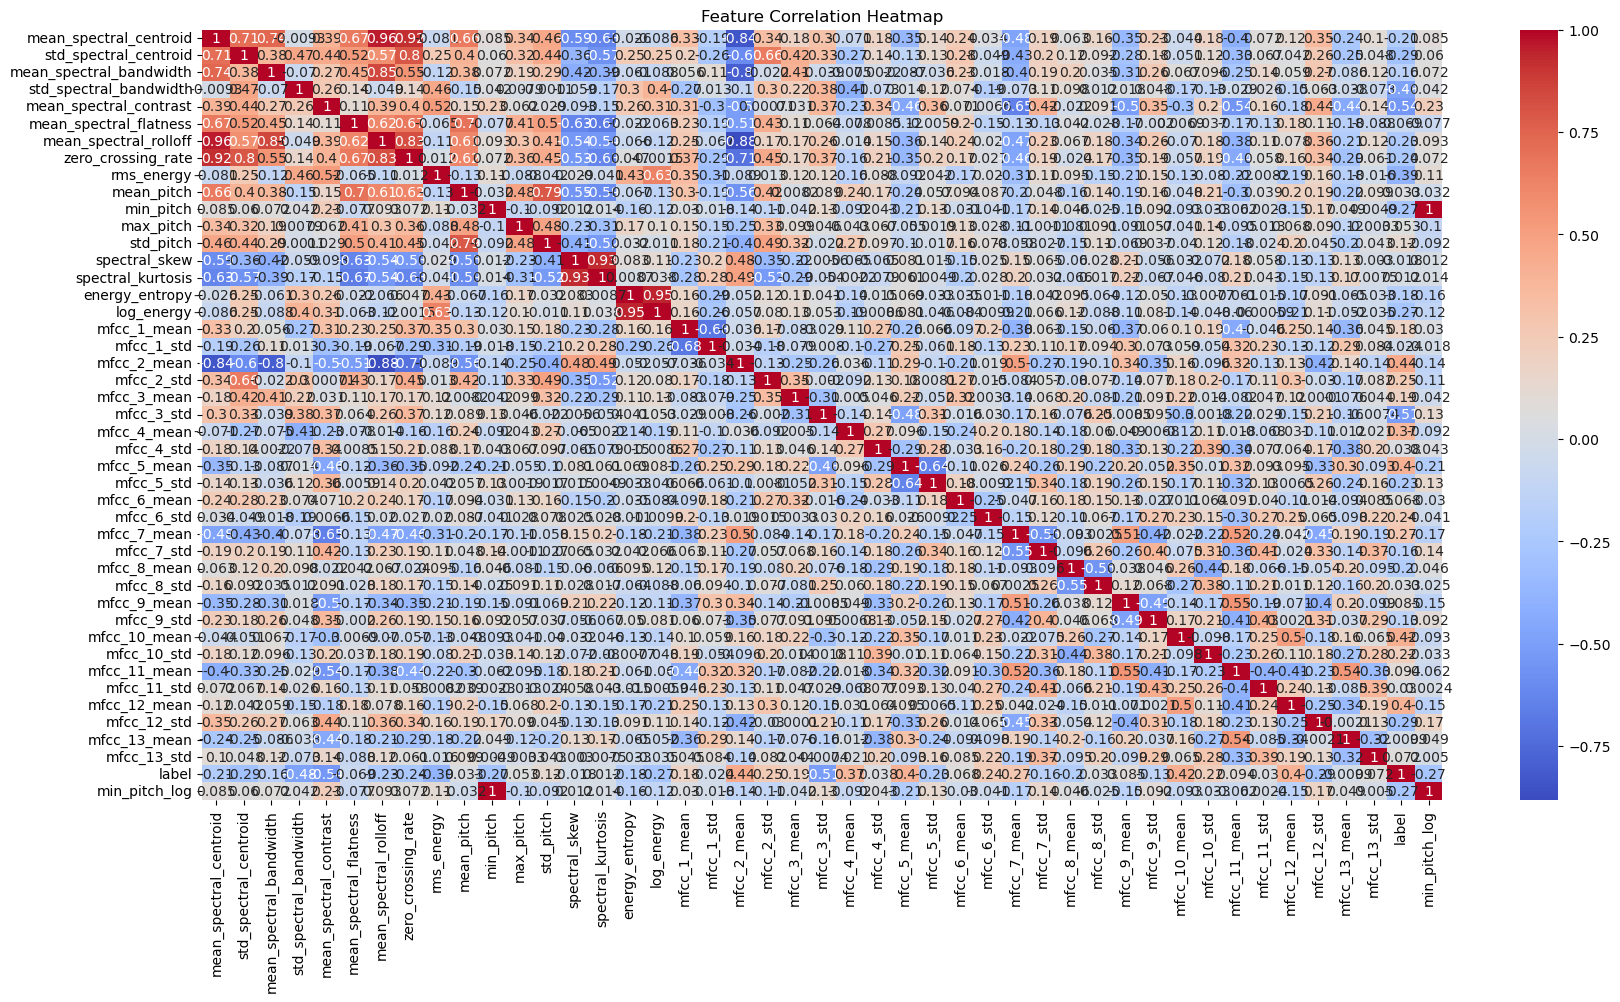

In [36]:
# Plotting correlation Matrix with heatmap

plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


In [37]:
# finding highly correlated features (>0.95)
# computing correlation
corr_matrix = df.corr().abs()

# creating an upper triangle matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)) # avoid duplicate pairs & diagonal
# finding features with coorelation >0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

print("Highly correlated features:")
print(to_drop)

Highly correlated features:
['mean_spectral_rolloff', 'min_pitch_log']


In [38]:
# Find all pairs with correlation > 0.95
high_corr_pairs = upper.stack().reset_index()
high_corr_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']
high_corr_pairs = high_corr_pairs[high_corr_pairs['Correlation'] > 0.95]

print(high_corr_pairs)

                  Feature 1              Feature 2  Correlation
5    mean_spectral_centroid  mean_spectral_rolloff     0.958309
428               min_pitch          min_pitch_log     0.999995


In [39]:
# dropping the features
df_reduced = df.drop(columns=to_drop)

## Feature Selection

In [41]:
# Using SelectKBest, f_classif

x = df.drop('label', axis=1)
y = df['label']

sk = SelectKBest(score_func=f_classif, k='all')
x_new = sk.fit_transform(x, y)

# Showing feature scores
feature_scores = pd.DataFrame({'Feature': x.columns,'Score': sk.scores_})
feature_scores = feature_scores.sort_values(by='Score', ascending=False)
print(feature_scores)

                    Feature        Score
4    mean_spectral_contrast  6653.855947
22               mfcc_3_std  5688.761423
3    std_spectral_bandwidth  4810.642965
19              mfcc_2_mean  3980.897548
35             mfcc_10_mean  3480.698237
25              mfcc_5_mean  3165.893771
39             mfcc_12_mean  3157.774389
8                rms_energy  2865.977109
23              mfcc_4_mean  2627.017762
40              mfcc_12_std  1537.605330
1     std_spectral_centroid  1536.484610
29              mfcc_7_mean  1311.928977
10                min_pitch  1280.810057
43            min_pitch_log  1279.823656
16               log_energy  1235.276495
20               mfcc_2_std  1045.125592
7        zero_crossing_rate  1010.623100
28               mfcc_6_std   985.265816
26               mfcc_5_std   905.417502
6     mean_spectral_rolloff   880.080468
36              mfcc_10_std   786.782168
0    mean_spectral_centroid   761.054687
31              mfcc_8_mean   697.031914
21              

In [ ]:
# Selecting top 17 Features 
model = RandomForestClassifier(random_state=42)
rfe = RFE(model, n_features_to_select=17)
fit = rfe.fit(x, y)
selected_features = x.columns[fit.support_]
print("Selected features:", selected_features)

## Scaling

In [ ]:
#  converting all scalers into dictionary
scalers = {
    "Standard": StandardScaler(),
    "MinMax": MinMaxScaler(),
    "Robust": RobustScaler()
}

for name, scaler in scalers.items():
    scaled_X = scaler.fit_transform(X[selected_features])
    print(f"{name} scaler applied. Shape: {scaled_X.shape}")

In [ ]:
# Splitting data for training and test

X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.2, random_state=42, stratify=y)


## Building Model

In [ ]:
# For building model we use LogisticRegression, RandomForestClassifier, GradientBoostingClassifier,SVC, and DecisionTreeClassifier
# converting all models into dictionary

models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC()
}

# Fitting and training the data
results = {}

for model_name, model in models.items():
    #training
    model.fit(X_train,y_train)

    #predicting
    y_pred = model.predict(X_test)

    # Accuracy
    accuracy = accuracy_score(y_test,y_pred)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)

    # Classification Report
    cr = classification_report(y_test, y_pred)

    # Store results in Dictionary
    results[model_name] = {
         "Accuracy": accuracy,
        "Confusion Matrix": cm,
        "Classification Report": cr
    }


In [ ]:
# Showing the results

# Print the results
for model_name, metrics in results.items():
    print(f"\n{model_name} Results:")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print(f"Confusion Matrix:\n{metrics['Confusion Matrix']}")
    print(f"Classification Report:\n{metrics['Classification Report']}")

## Cross Validation


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(SVC(), X_scaled, y, cv=5)
print(f"Mean CV Accuracy:{scores.mean():.4f}")